# UMAPs Neurips samples, NK cells

Surface markers + respective RNA

- CLR normalized data

### Reference 4: #

Yang, C., Siebert, J. R., Burns, R., Gerbec, Z. J., Bonacci, B., Rymaszewski, A., Rau, M., Riese, M. J., Rao, S., Carlson, K. S., Routes, J. M., Verbsky, J. W., Thakar, M. S., & Malarkannan, S. (2019). Heterogeneity of human bone marrow and blood natural killer cells defined by single-cell transcriptome. Nature communications, 10(1), 3931. https://doi.org/10.1038/s41467-019-11947-7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Neurips
adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [3]:
#To find gene names

result = [i for i in adata_neurips.var_names if i.startswith('TC')]
print(result)

['TC2N', 'TCAF1', 'TCAF2', 'TCAIM', 'TCAP', 'TCEA1', 'TCEA2', 'TCEA3', 'TCEAL1', 'TCEAL2', 'TCEAL3', 'TCEAL4', 'TCEAL5', 'TCEAL7', 'TCEAL8', 'TCEAL9', 'TCEANC', 'TCEANC2', 'TCEB1', 'TCEB2', 'TCEB3', 'TCEB3-AS1', 'TCERG1', 'TCF12', 'TCF15', 'TCF19', 'TCF20', 'TCF23', 'TCF25', 'TCF3', 'TCF4', 'TCF4-AS2', 'TCF7', 'TCF7L1', 'TCF7L2', 'TCFL5', 'TCHH', 'TCHP', 'TCIRG1', 'TCL1A', 'TCL1B', 'TCL6', 'TCN2', 'TCOF1', 'TCP1', 'TCP10L', 'TCP11', 'TCP11L1', 'TCP11L2', 'TCTA', 'TCTE1', 'TCTE3', 'TCTEX1D1', 'TCTEX1D2', 'TCTEX1D4', 'TCTN1', 'TCTN2', 'TCTN3']


In [4]:
adata_neurips.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT']

In [5]:
#Both NK cell types selected


neurips_nk = adata_neurips[(adata_neurips.obs['cell_type'] == "NK") | (adata_neurips.obs['cell_type'] == "NK CD158e1+")]

In [6]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [7]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [8]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

In [9]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [10]:
#selecting one sample from Neurips

eg=adata_neurips[adata_neurips.obs['POOL'] == "s4d1"]


In [11]:
eg

View of AnnData object with n_obs × n_vars = 4885 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [12]:
prot=eg.obsm['protein_expression_clr_neurips']

In [13]:
prot

CD86     CD274     CD270     CD155     CD112  \
GTAGTACCAATCCTTT-1-s4d1  0.652674  1.447594  1.489354  0.890243  1.290341   
CTCAAGAGTCACAGAG-1-s4d1  0.652674  1.069339  1.657770  0.890243  1.377072   
CTGTGGGTCATGCGGC-1-s4d1  0.378666  1.132949  1.153412  0.730824  1.195368   
CGTGATAGTTATCTGG-1-s4d1  0.000000  1.249182  1.335424  1.256332  2.674106   
AGATCCAAGATCGGTG-1-s4d1  2.784459  1.132949  1.674846  1.669058  1.663981   
...                           ...       ...       ...       ...       ...   
TAGATCGTCTCTATAC-1-s4d1  0.000000  1.132949  1.358918  1.523729  1.195368   
AAGACTCAGGGCAAGG-1-s4d1  0.652674  1.302596  1.208881  0.541080  1.090419   
CGAGAAGCACCTCGTT-1-s4d1  0.378666  0.764571  1.208881  0.730824  1.494512   
TATCCTAGTTCTCCTG-1-s4d1  0.000000  1.302596  1.286711  0.890243  1.377072   
TGCCGAGCAACAAAGT-1-s4d1  0.378666  1.302596  1.786846  0.541080  1.724470   

                             CD47      CD48      CD40     CD154      CD52  \
GTAGTACCAATCCTTT-1-s4d1  1.988618  1.733474  0.850004  1.531390  0.694828   
CTCAAGAGTCACAGAG-1-s4d1  1.264995  1.863027  1.101769  1.562259  1.072649   
CTGTGGGTCATGCGGC-1-s4d1  1.546005  1.090567  1.173337  1.303511  1.013739   
CGTGATAGTTATCTGG-1-s4d1  1.322314  0.289336  1.240123  1.397398  1.525053   
AGATCCAAGATCGGTG-1-s4d1  2.101246  2.112640  1.417276  1.884321  1.861734   
...                           ...       ...       ...       ...       ...   
TAGATCGTCTCTATAC-1-s4d1  1.312986  1.077960  1.173337  1.690467  1.013739   
AAGACTCAGGGCAAGG-1-s4d1  1.589583  1.436578  1.240123  1.379313  0.561056   
CGAGAAGCACCTCGTT-1-s4d1  1.944753  2.308527  0.941152  1.342130  1.231042   
TATCCTAGTTCTCCTG-1-s4d1  1.150531  0.882414  1.469979  1.649530  0.607664   
TGCCGAGCAACAAAGT-1-s4d1  1.603697  1.857224  0.941152  1.767631  2.943224   

                         ...     HLA-E      CD82     CD101      CD88  \
GTAGTACCAATCCTTT-1-s4d1  ...  1.532575  0.614600  0.900688  1.389844   
CTCAAGAGTCACAGAG-1-s4d1  ...  1.283465  0.614600  1.786480  0.762359   
CTGTGGGTCATGCGGC-1-s4d1  ...  1.344431  0.353792  0.860303  0.979461   
CGTGATAGTTATCTGG-1-s4d1  ...  0.859205  1.527772  0.629556  0.854928   
AGATCCAAGATCGGTG-1-s4d1  ...  1.429432  1.031029  2.808629  2.007436   
...                      ...       ...       ...       ...       ...   
TAGATCGTCTCTATAC-1-s4d1  ...  1.482333  0.353792  0.576253  1.157734   
AAGACTCAGGGCAAGG-1-s4d1  ...  1.149104  0.614600  0.818218  1.189870   
CGAGAAGCACCTCGTT-1-s4d1  ...  1.184424  0.773465  0.939506  1.017749   
TATCCTAGTTCTCCTG-1-s4d1  ...  1.401893  1.405442  0.860303  1.124532   
TGCCGAGCAACAAAGT-1-s4d1  ...  1.344431  3.507507  3.029109  1.363610   

                            CD224  CD197  CD34  CD10  CD90  CD15  
GTAGTACCAATCCTTT-1-s4d1  0.918109    0.0   0.0   0.0   0.0   0.0  
CTCAAGAGTCACAGAG-1-s4d1  1.112478    0.0   0.0   0.0   0.0   0.0  
CTGTGGGTCATGCGGC-1-s4d1  1.147198    0.0   0.0   0.0   0.0   0.0  
CGTGATAGTTATCTGG-1-s4d1  1.000442    0.0   0.0   0.0   0.0   0.0  
AGATCCAAGATCGGTG-1-s4d1  2.064066    0.0   0.0   0.0   0.0   0.0  
...                           ...    ...   ...   ...   ...   ...  
TAGATCGTCTCTATAC-1-s4d1  1.304730    0.0   0.0   0.0   0.0   0.0  
AAGACTCAGGGCAAGG-1-s4d1  1.180752    0.0   0.0   0.0   0.0   0.0  
CGAGAAGCACCTCGTT-1-s4d1  1.112478    0.0   0.0   0.0   0.0   0.0  
TATCCTAGTTCTCCTG-1-s4d1  1.304730    0.0   0.0   0.0   0.0   0.0  
TGCCGAGCAACAAAGT-1-s4d1  1.868853    0.0   0.0   0.0   0.0   0.0  

[4885 rows x 139 columns]

In [14]:
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD226':'CD226_prot', 'TIGIT':'TIGIT_prot', 'CD27':'CD27_prot', 'CD38': 'CD38_prot', 'CD224': 'CD224_prot', 'CD7': 'CD7_prot', 'CD44': 'CD44_prot', 'CD34': 'CD34_prot','CD5': 'CD5_prot'})


In [15]:
#some proteins and genes have same names, here _prot added after protein names

a = eg.obs
b = prot

adata_eg=pd.concat([a, b], axis=1)
eg.obs=adata_eg



In [16]:
#selecting NK cells, gd T cells and ILCs

sample_nk = eg[(eg.obs['cell_type'] == "NK") | (eg.obs['cell_type'] == "NK CD158e1+") | (eg.obs['cell_type'] == "ILC") | (eg.obs['cell_type'] == "gdT CD158b+")]   


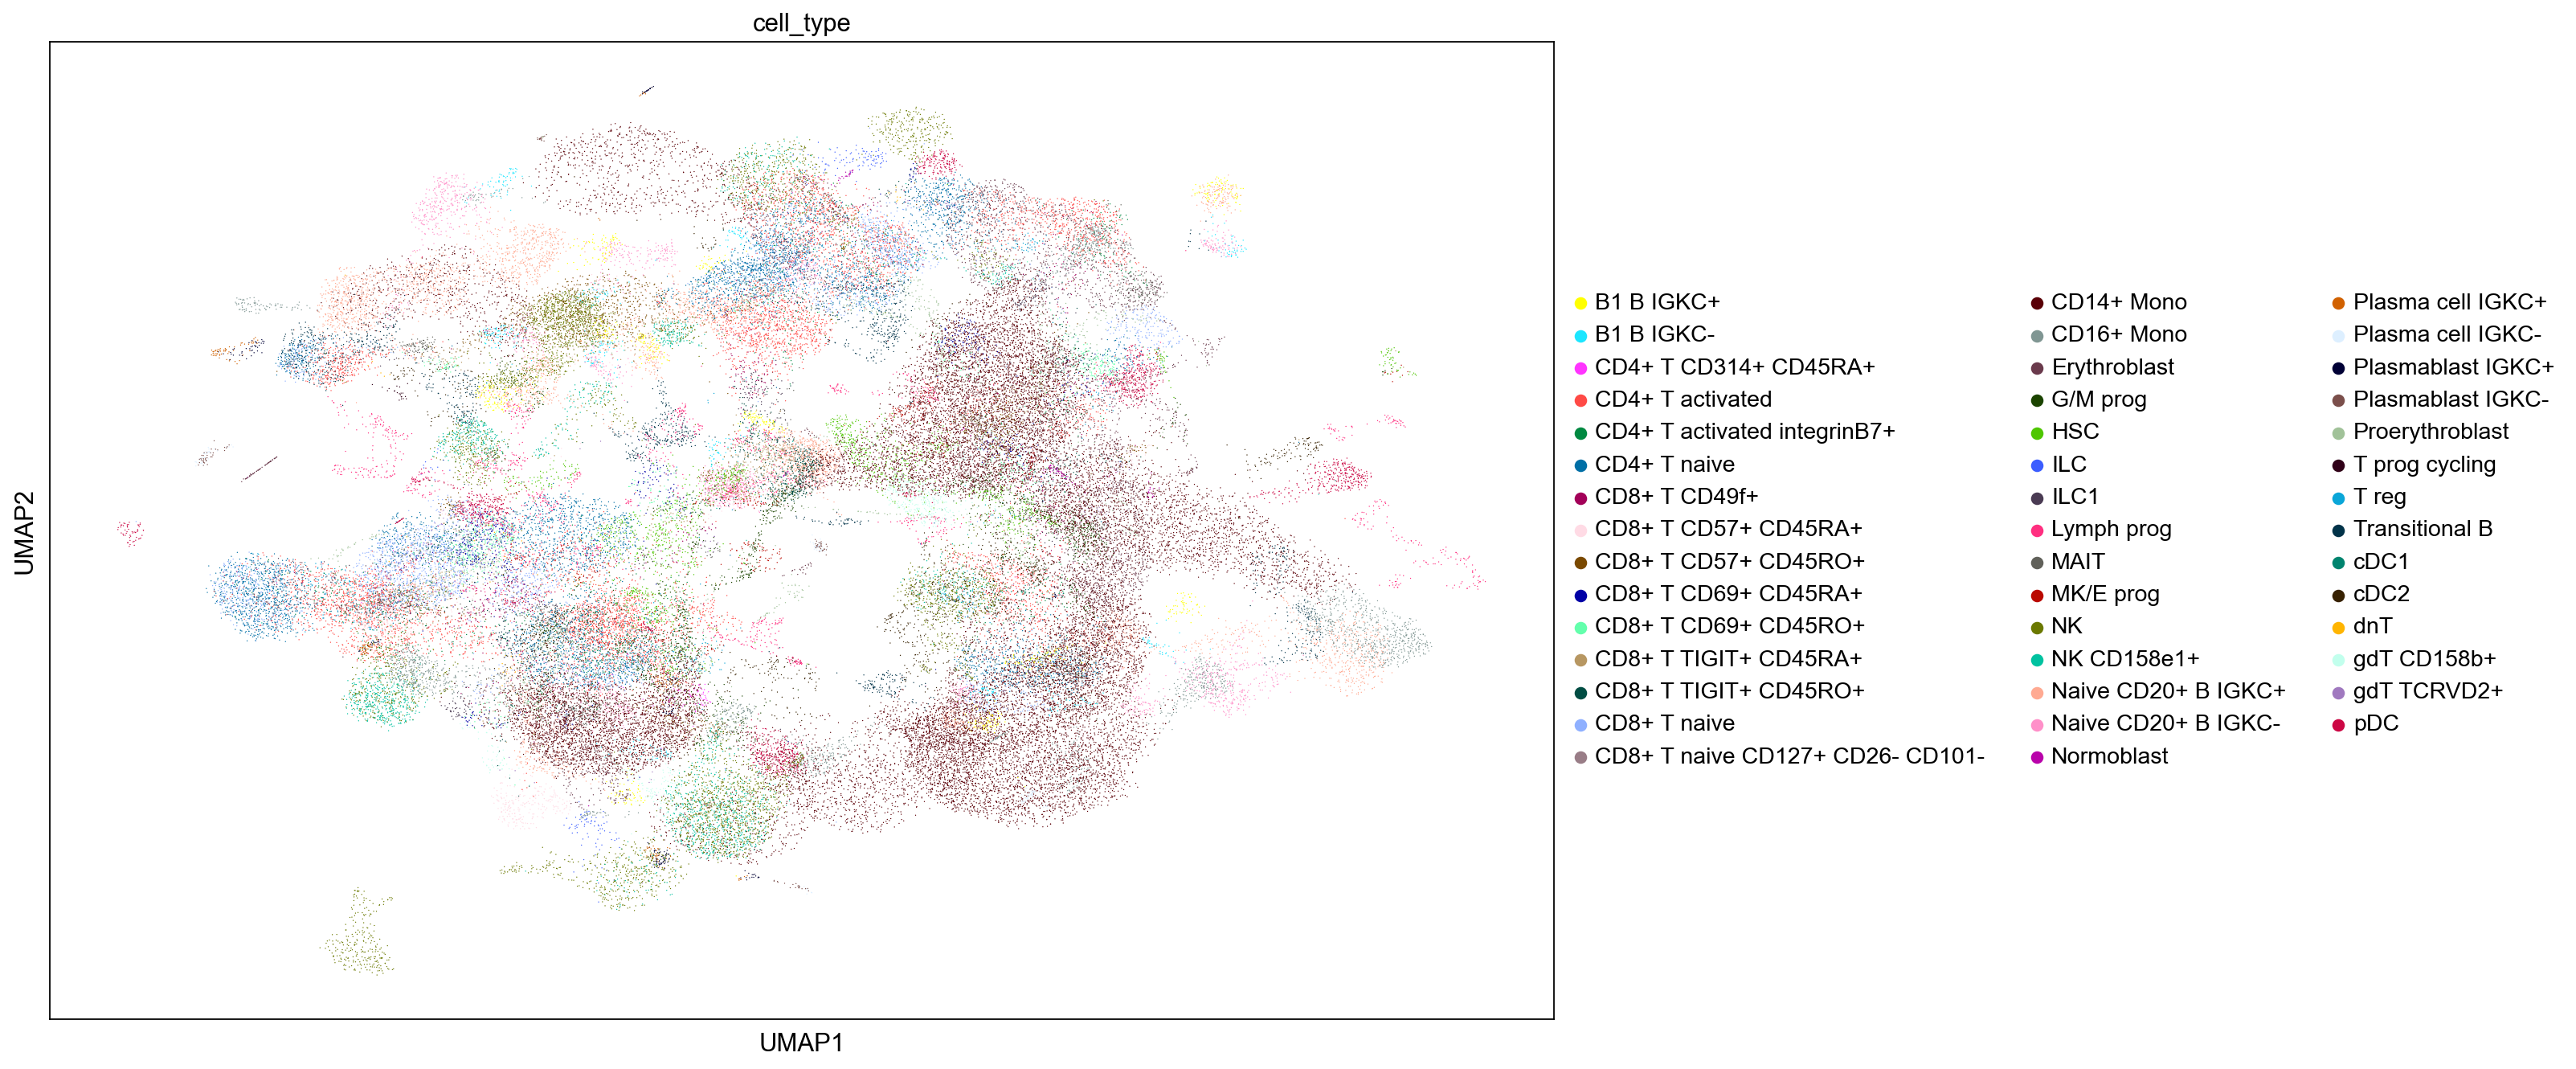

In [17]:
#Whole Neurips dataset plotted

sc.set_figure_params(figsize=(15, 10))

sc.pl.umap(adata_neurips, color = ['cell_type'], color_map = 'viridis')

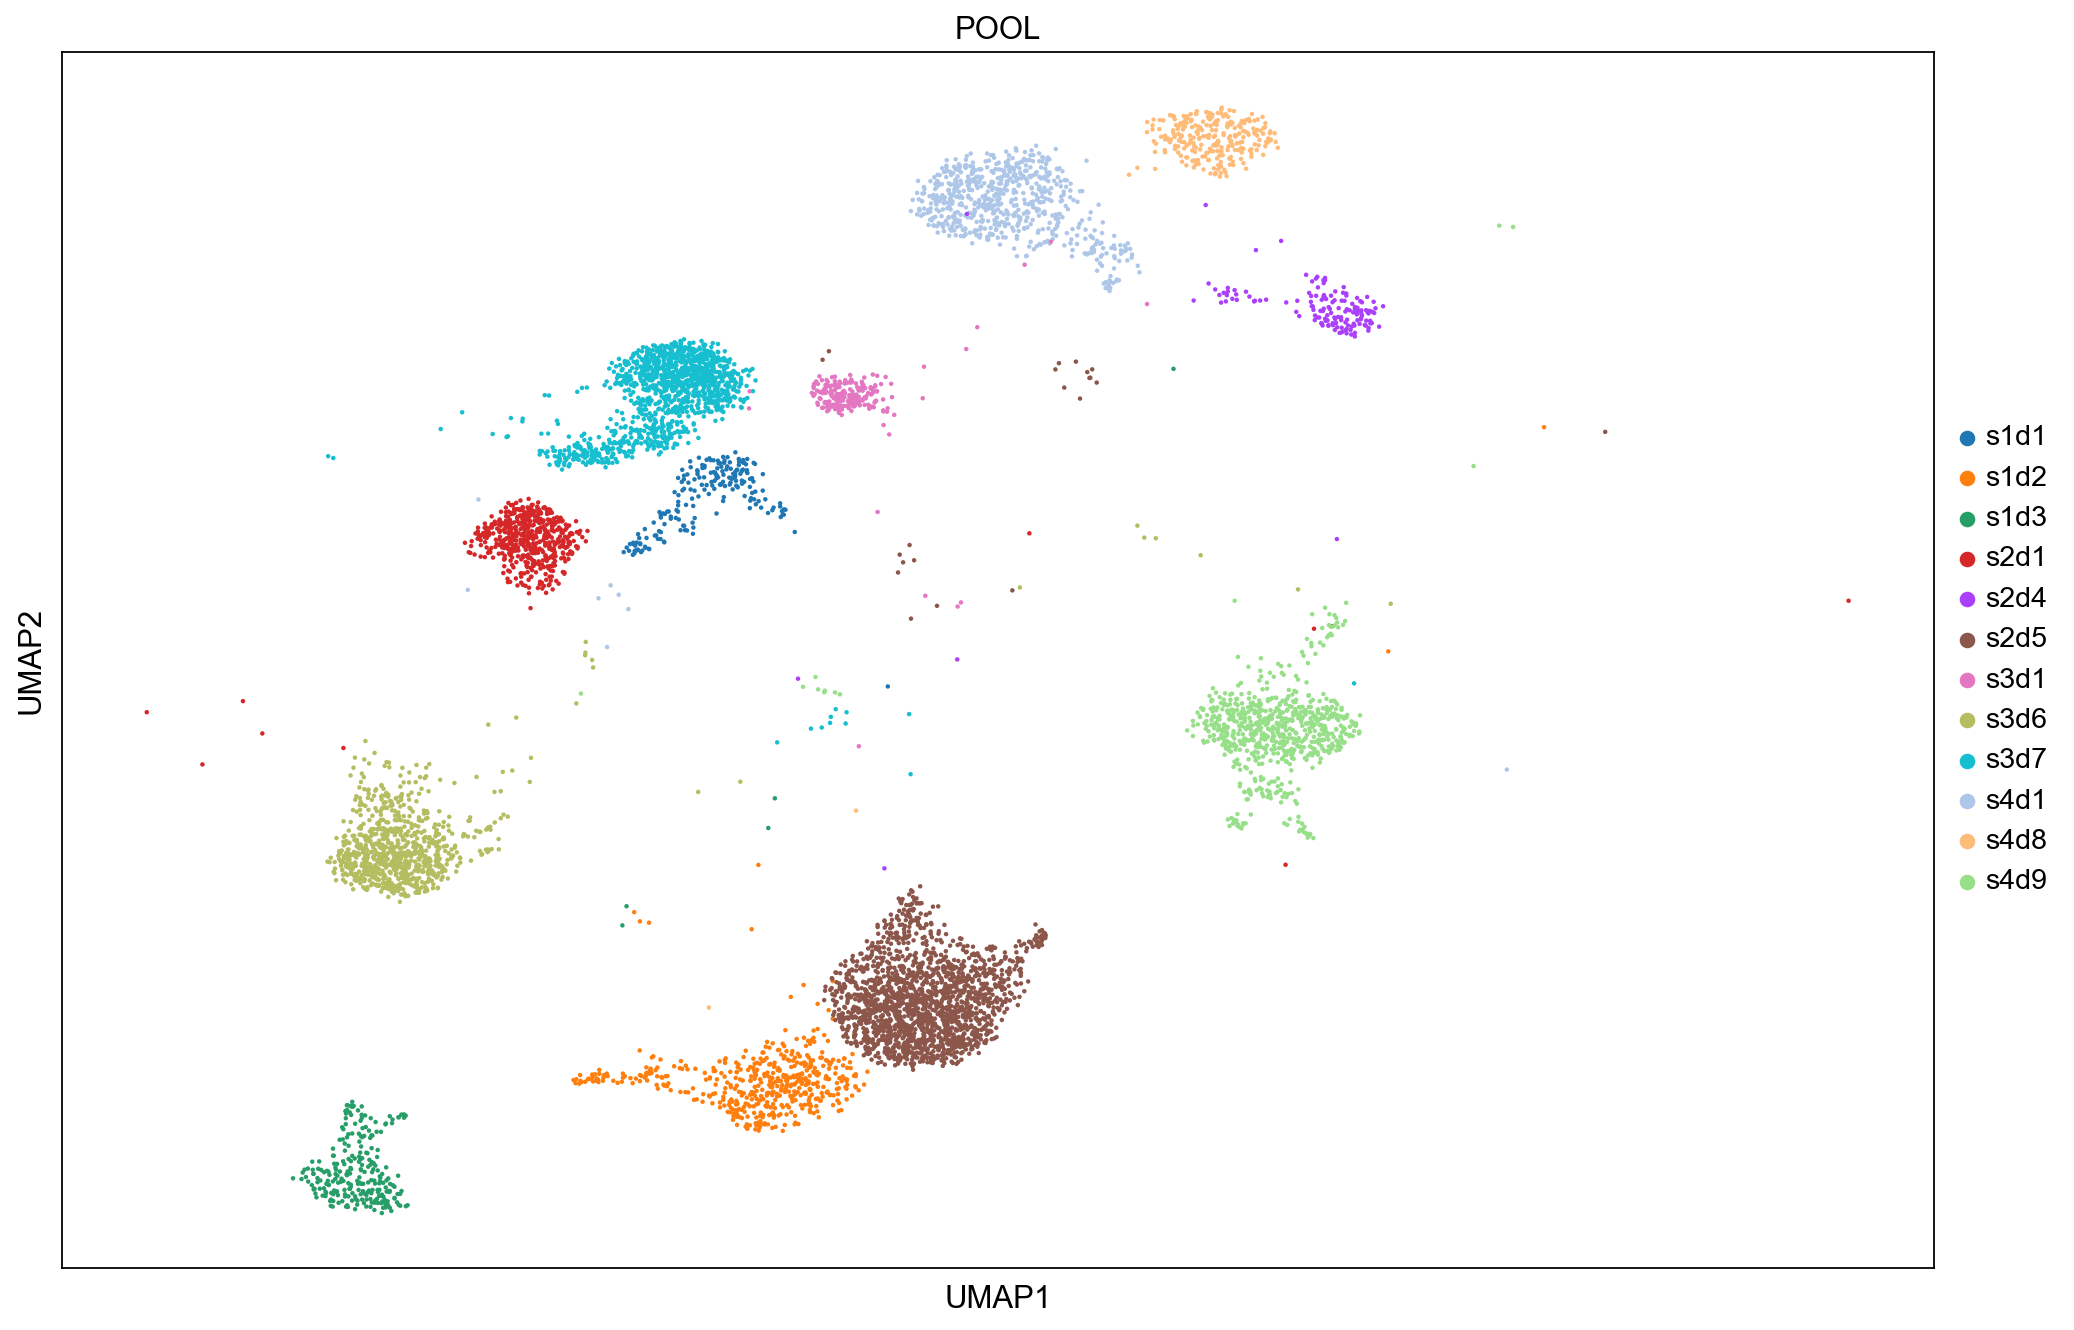

In [18]:
# NK cells from Neurips dataset, coloured by samples

sc.set_figure_params(figsize=(15, 10))

sc.pl.umap(neurips_nk, color = ['POOL'], color_map = 'viridis')

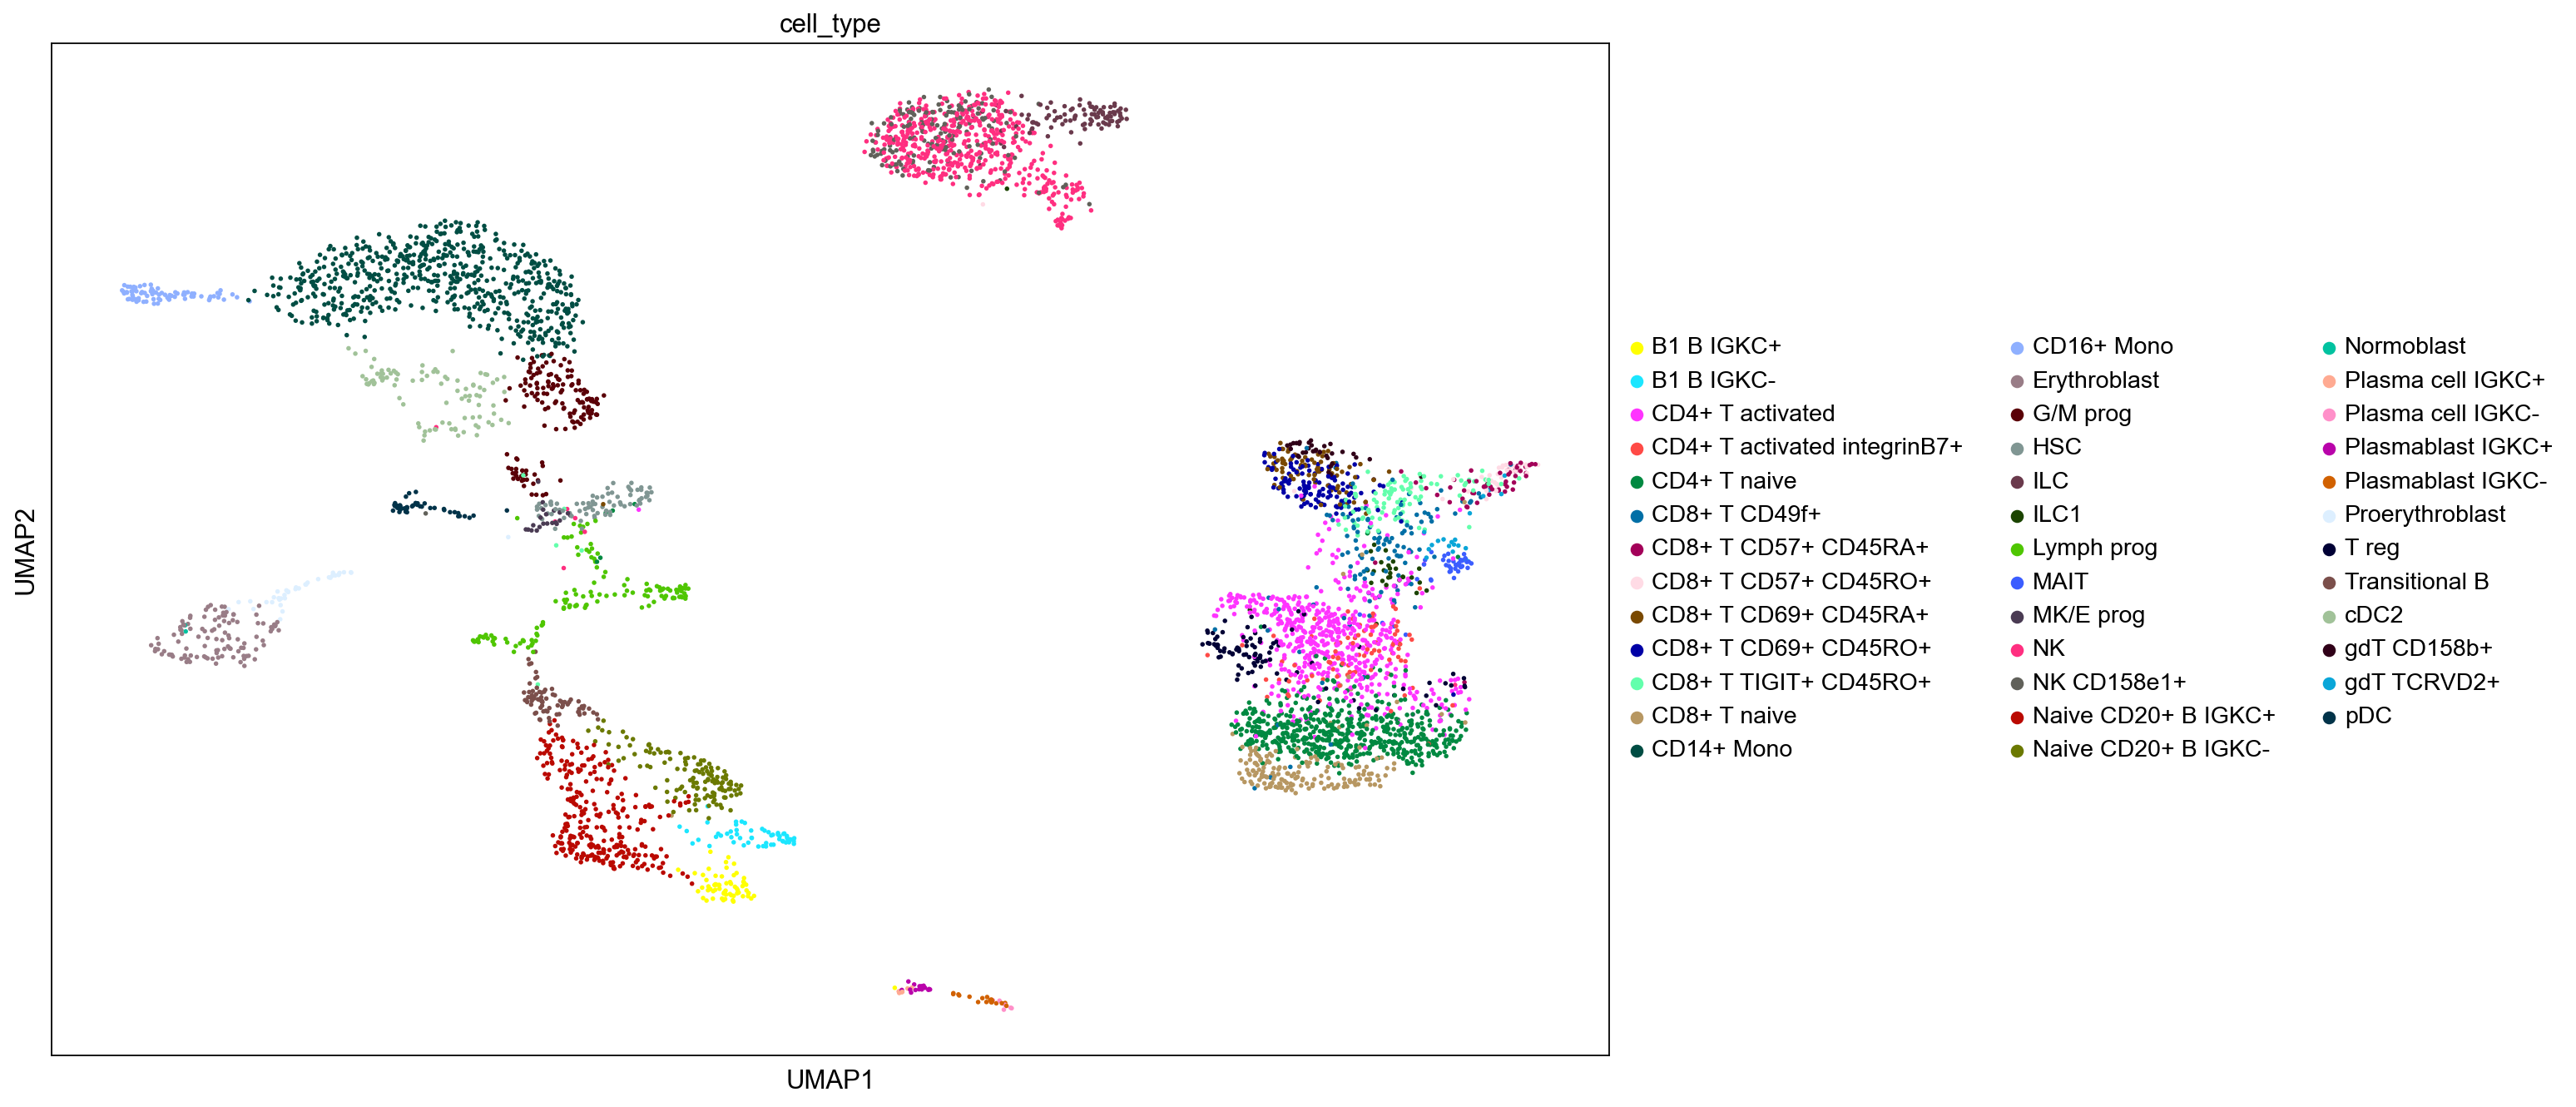

In [19]:
#Only selected sample

sc.set_figure_params(figsize=(15, 10))


sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

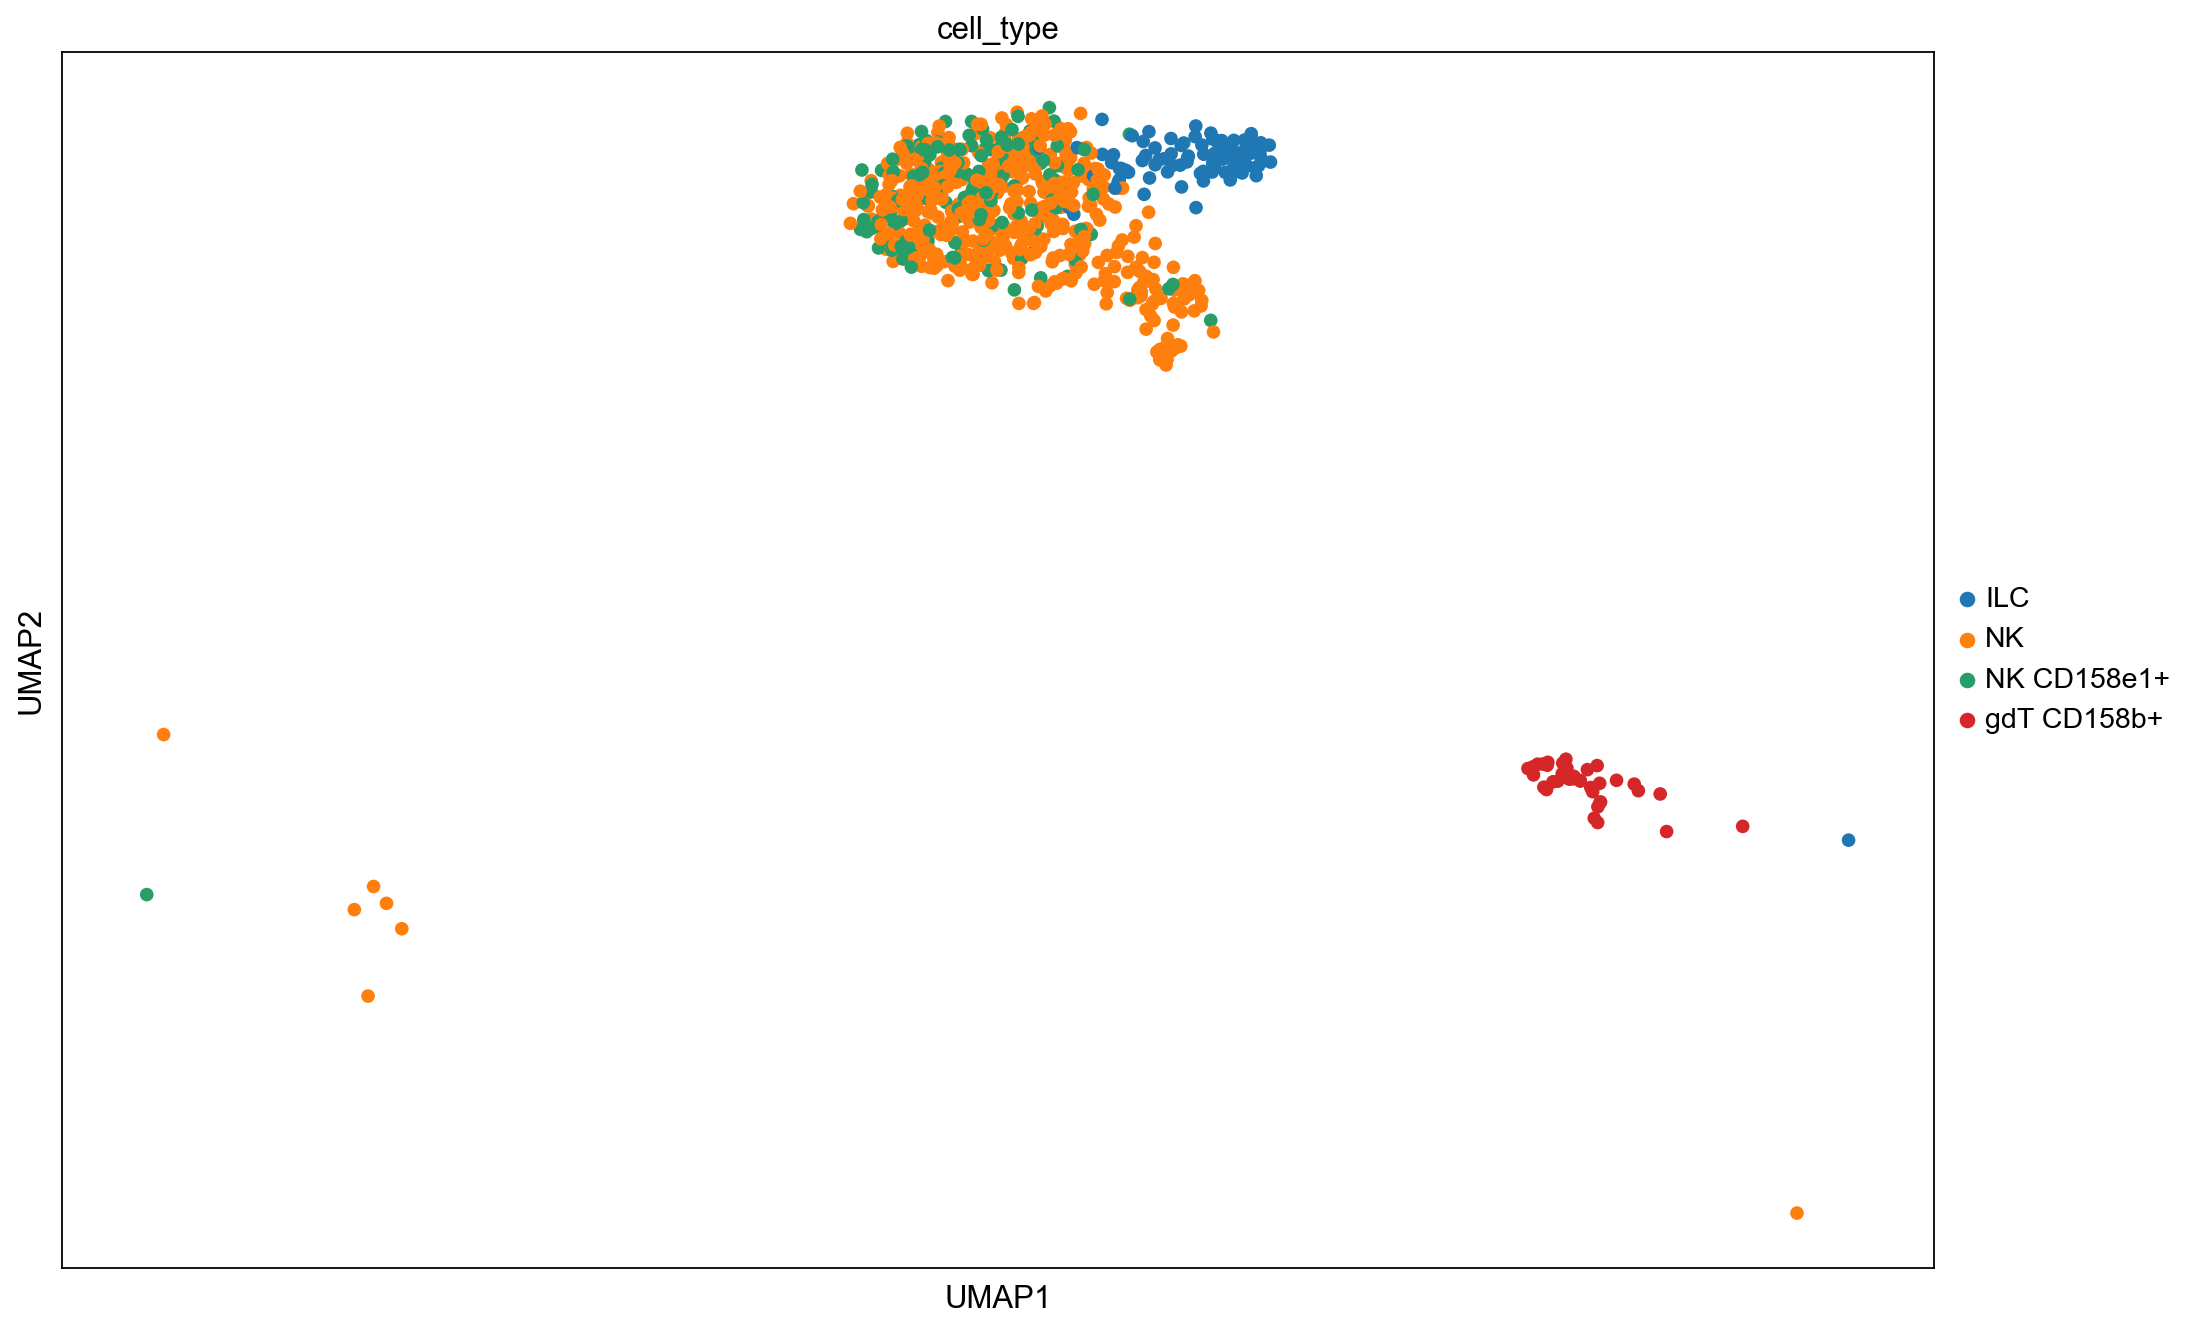

In [20]:
#NK, gd T cells and ILCs from selected sample

sc.pl.umap(sample_nk, color = ['cell_type'], color_map = 'viridis')

## Reference 4 Yang et al. 

- sscRNA-seq on BM and PB
- cells from six BM donors were combined into one group and the two peripheral blood donors into another for analyses. In totsl, 5567 and 3046 NK cells from the BM and blood. 

- Recently, the definition of the NK cell-restricted progenitor population has been redefined as Lin− CD34+CD38+CD123−CD45RA+CD7+CD10+CD127− cells as a consistent fraction of putative NK precursors in secondary lymphoid organs turn out to be ILCs or ILC progenitors

- NK cell maturation occurs mostly in secondary lymphidal organs. The analyses of NK cells from secondary lymphoidal organs will give insights into early NK developmental stages. In this study they were not able to detect earlier development states of NK cells
- 


- NK lineage: CD94 (KLRD1), NKp80 (KLRF1), NKG7, GNLY. NCAM1 (CD56) was not well represented in this study
- Markers used to catch NK cell progenitors/ILCs: Lin−, CD7+ (not all cells yet CD56+). 

### 7 clusters from BM NK cells: #
- CD56bright NK
- Transitional NK (intermediate expression of signature genes of either CD56bright or CD56dimCD57+ NK cells=
- Active NK,  
- Adaptive NK
- Mature NK 
- Terminal NK
- Inflamed NK



- CD56brigh: IL7RA (IL7R), CD62L (SELL), NKG2A (KLRC1), granzyme K (GZMK), CD44, XCL1, XCL2, 
- 


In [160]:
is_nk_yang = ['KLRD1', 'KLRF1', 'NKG7', 'GNLY', 'NCAM1'] #the most DE genes in NK cells
is_nk_yang_prot = ['CD94','CD56'] 

#NKp80 not in the ab panel of Neurips

# KLRD1 = CD94, NCAM1 = CD56

In [161]:
#Used to check which genes were measured

listOfmarkers= is_nk_yang
is_nk_yang = []

for x in listOfmarkers:
    if x in adata_neurips.var_names:
        is_nk_yang.append(x)

print(is_nk_yang)


['KLRD1', 'KLRF1', 'NKG7', 'GNLY', 'NCAM1']


In [162]:
#Used to check which markers were measured


listOfmarkers= is_nk_yang_prot
is_nk_yang_prot= []

for x in listOfmarkers:
    if x in prot.columns:
        print(x)



CD94
CD56


In [163]:
sample_nk.obs["CD94"]

GTAGTACCAATCCTTT-1-s4d1    2.475005
CTGTGGGTCATGCGGC-1-s4d1    1.408073
GCAACATTCGCAAGAG-1-s4d1    2.174035
TCACGGGTCGCACGAC-1-s4d1    3.016060
CGCCAGAAGACCATTC-1-s4d1    2.826218
                             ...   
CGTGATACACGACCTG-1-s4d1    2.580613
AGTCAACTCGCACGAC-1-s4d1    2.763305
GTTCTATCACGTCGGT-1-s4d1    1.603495
TAGATCGTCTCTATAC-1-s4d1    2.104804
AAGACTCAGGGCAAGG-1-s4d1    3.085629
Name: CD94, Length: 797, dtype: float64

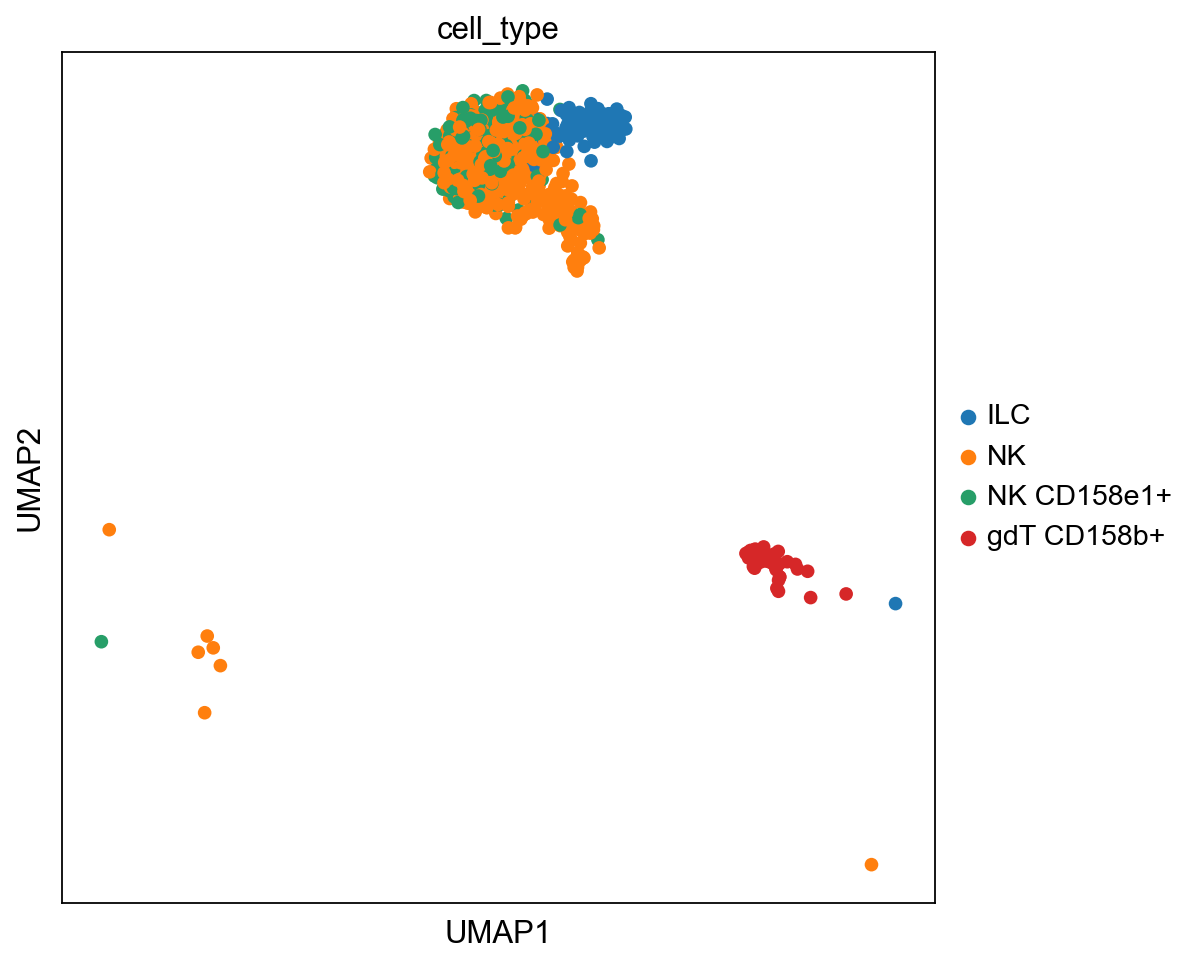

Is NK cell, RNA


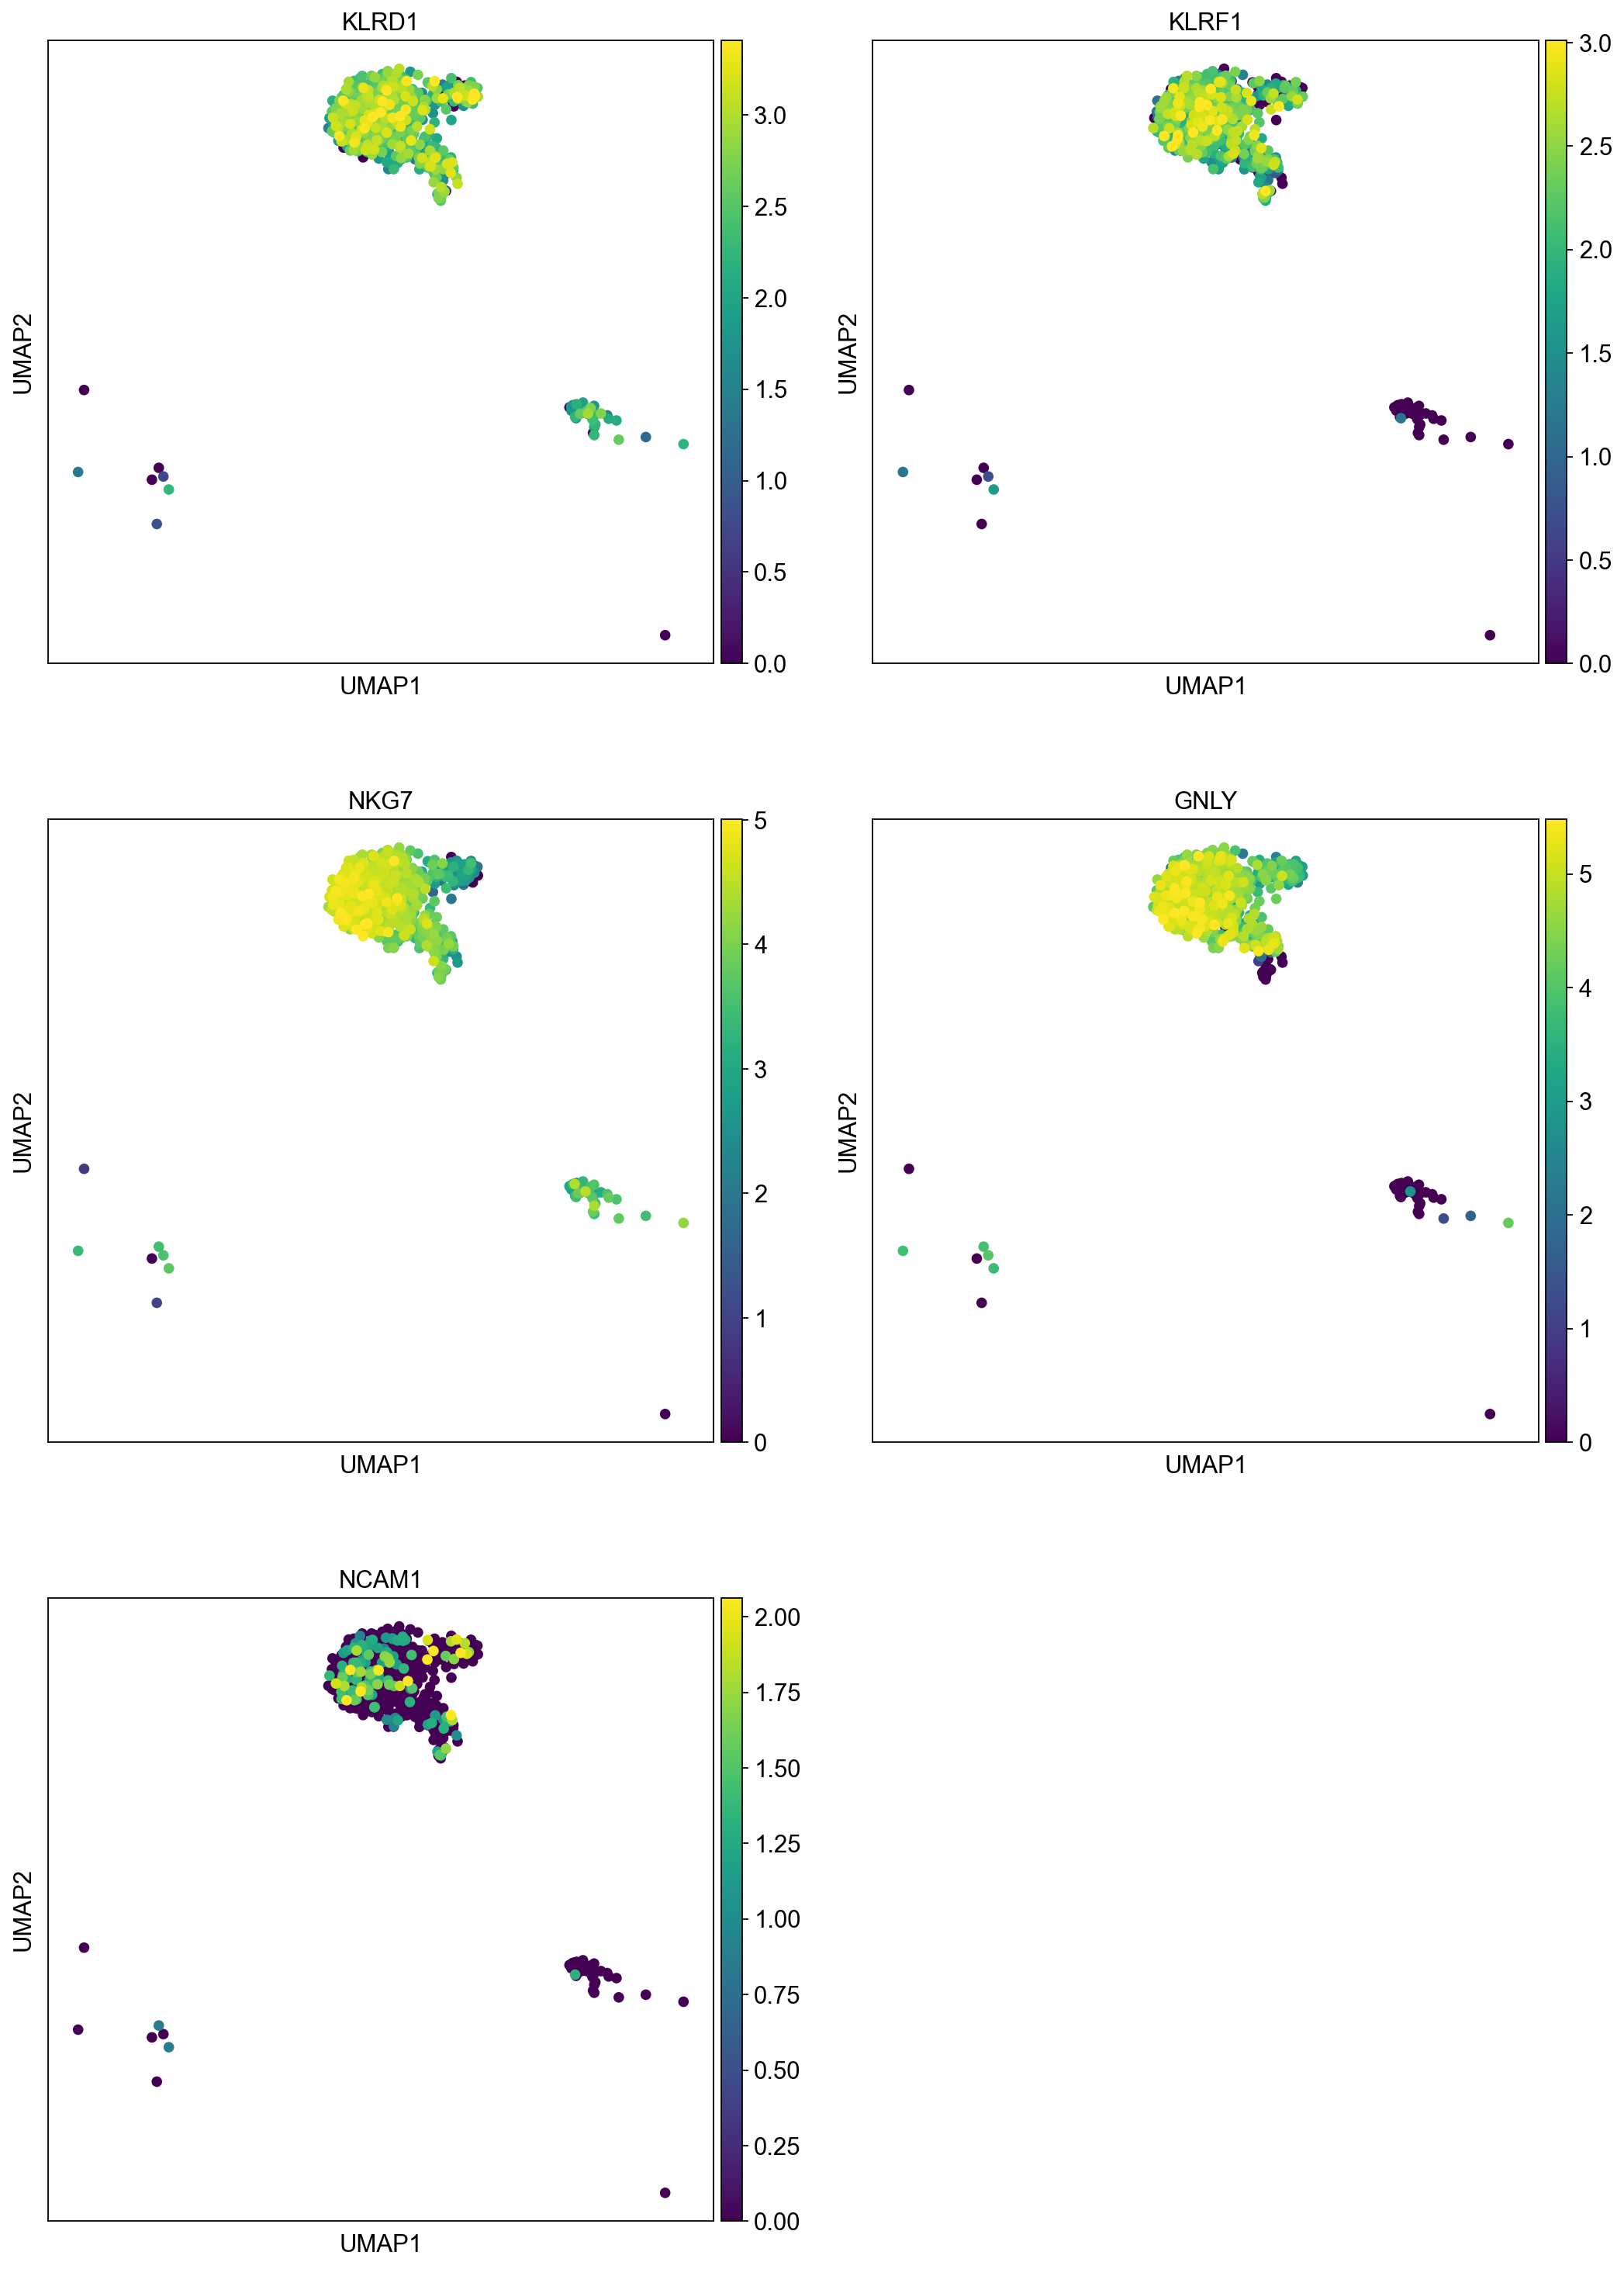

Is NK cell, protein (KLRD1 = CD94, NCAM1 = CD56)


ValueError: Could not broadast together arguments with shapes: [0, 1].

In [164]:
#Nk cell lineage definition


sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

print("Is NK cell, RNA")
sc.pl.umap(sample_nk, color = is_nk_yang, vmax="p99", color_map = 'viridis', ncols=2)

print("Is NK cell, protein (KLRD1 = CD94, NCAM1 = CD56)")

sc.pl.umap(sample_nk, color = is_nk_yang_prot, vmax="p99", color_map = 'viridis')

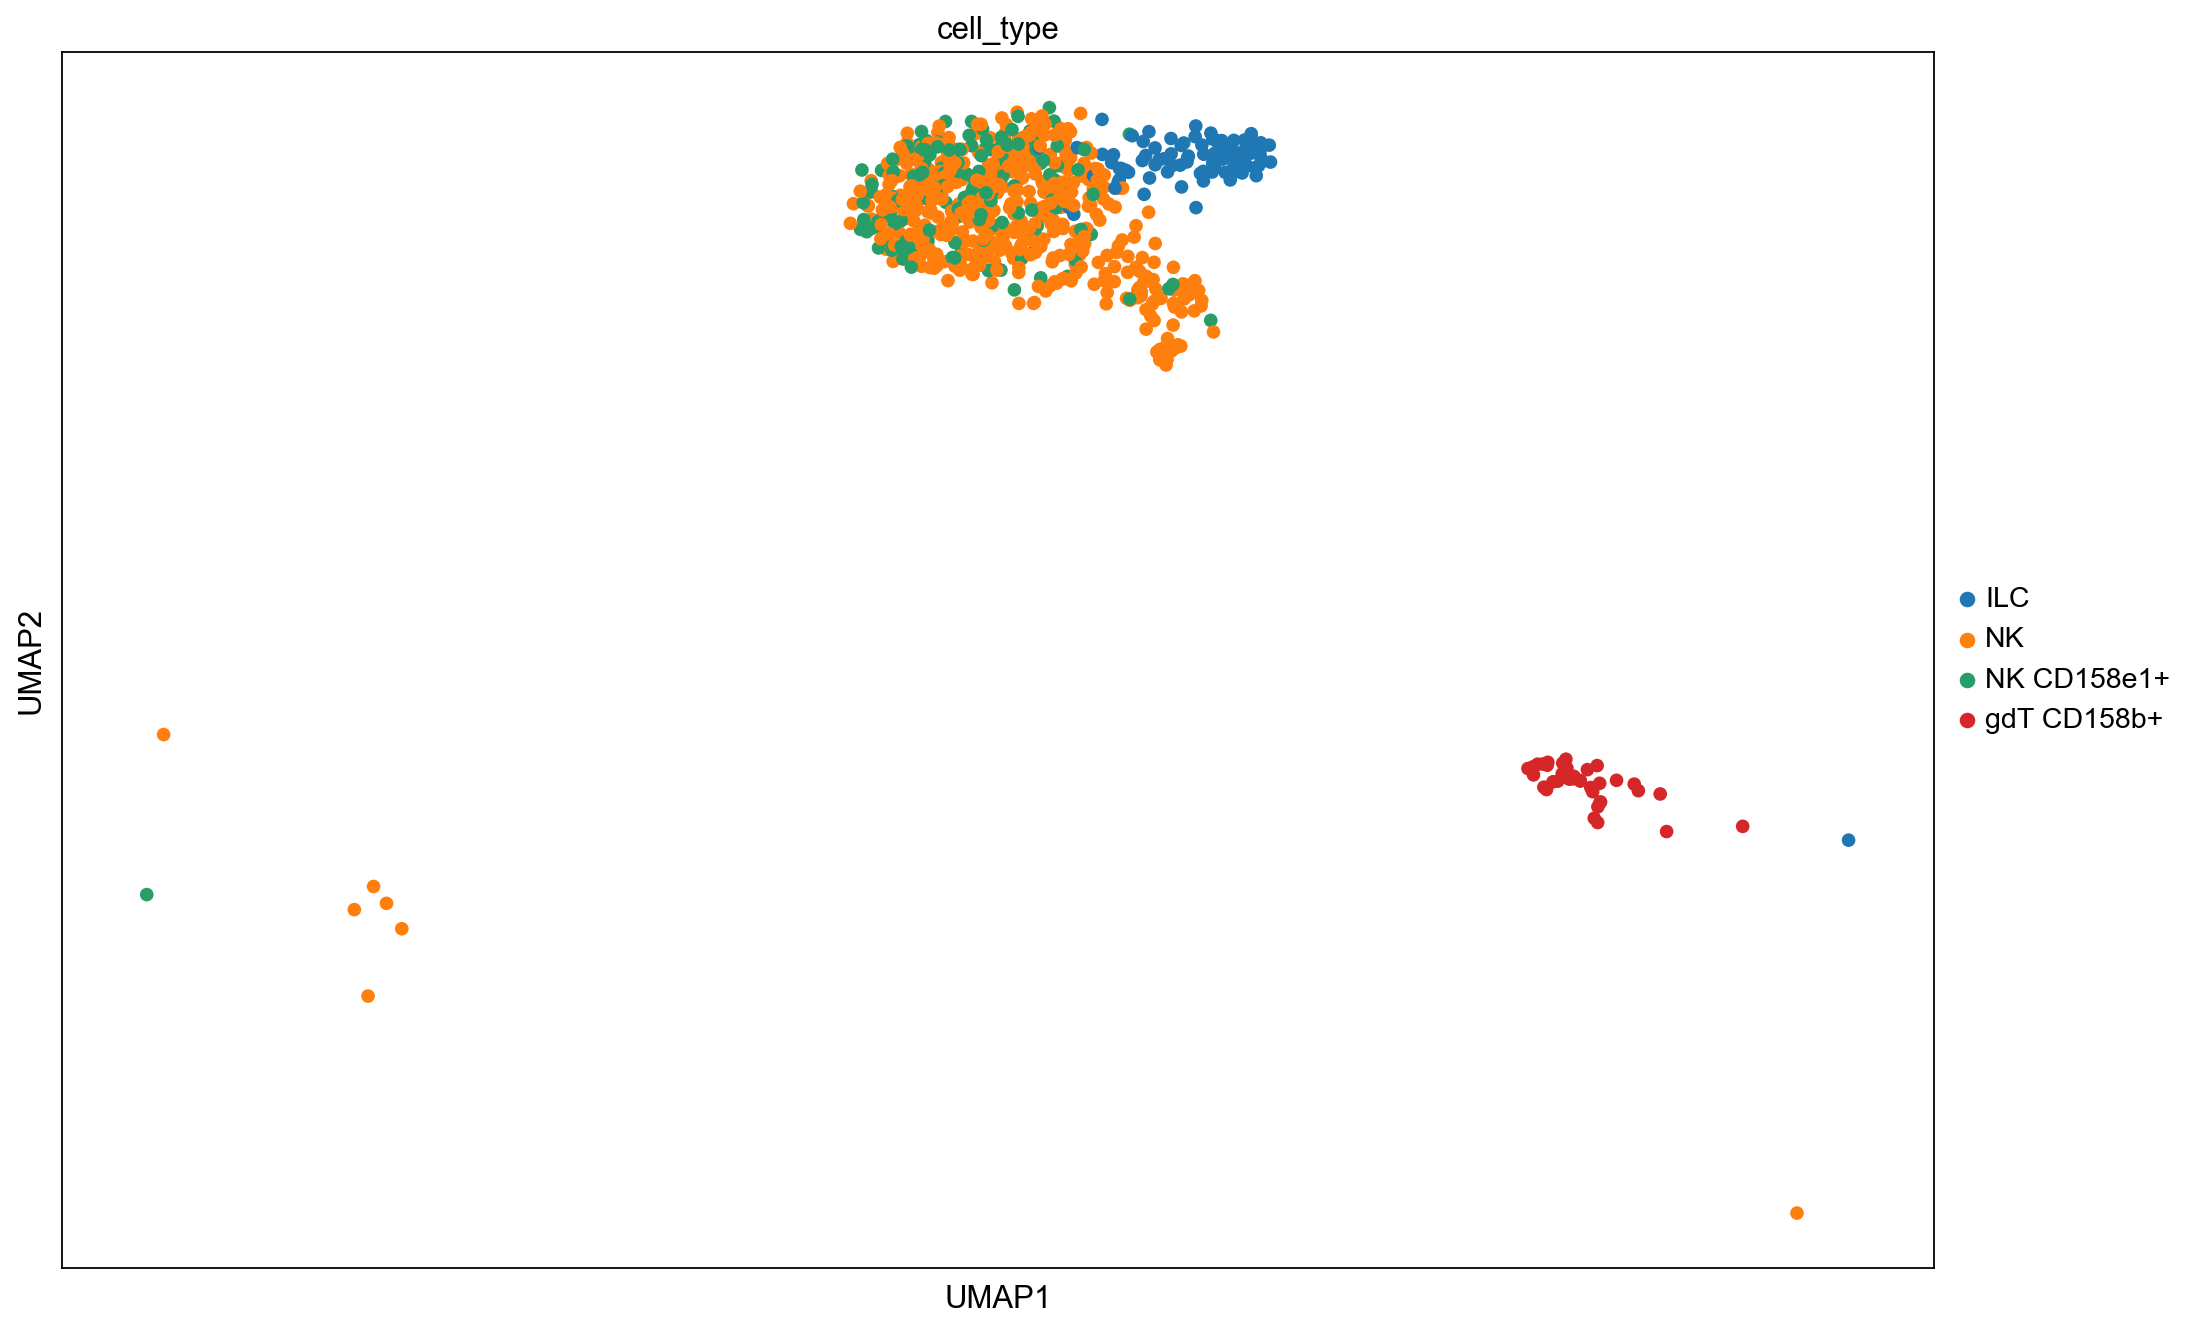

Immature CD56bright NK cell, RNA


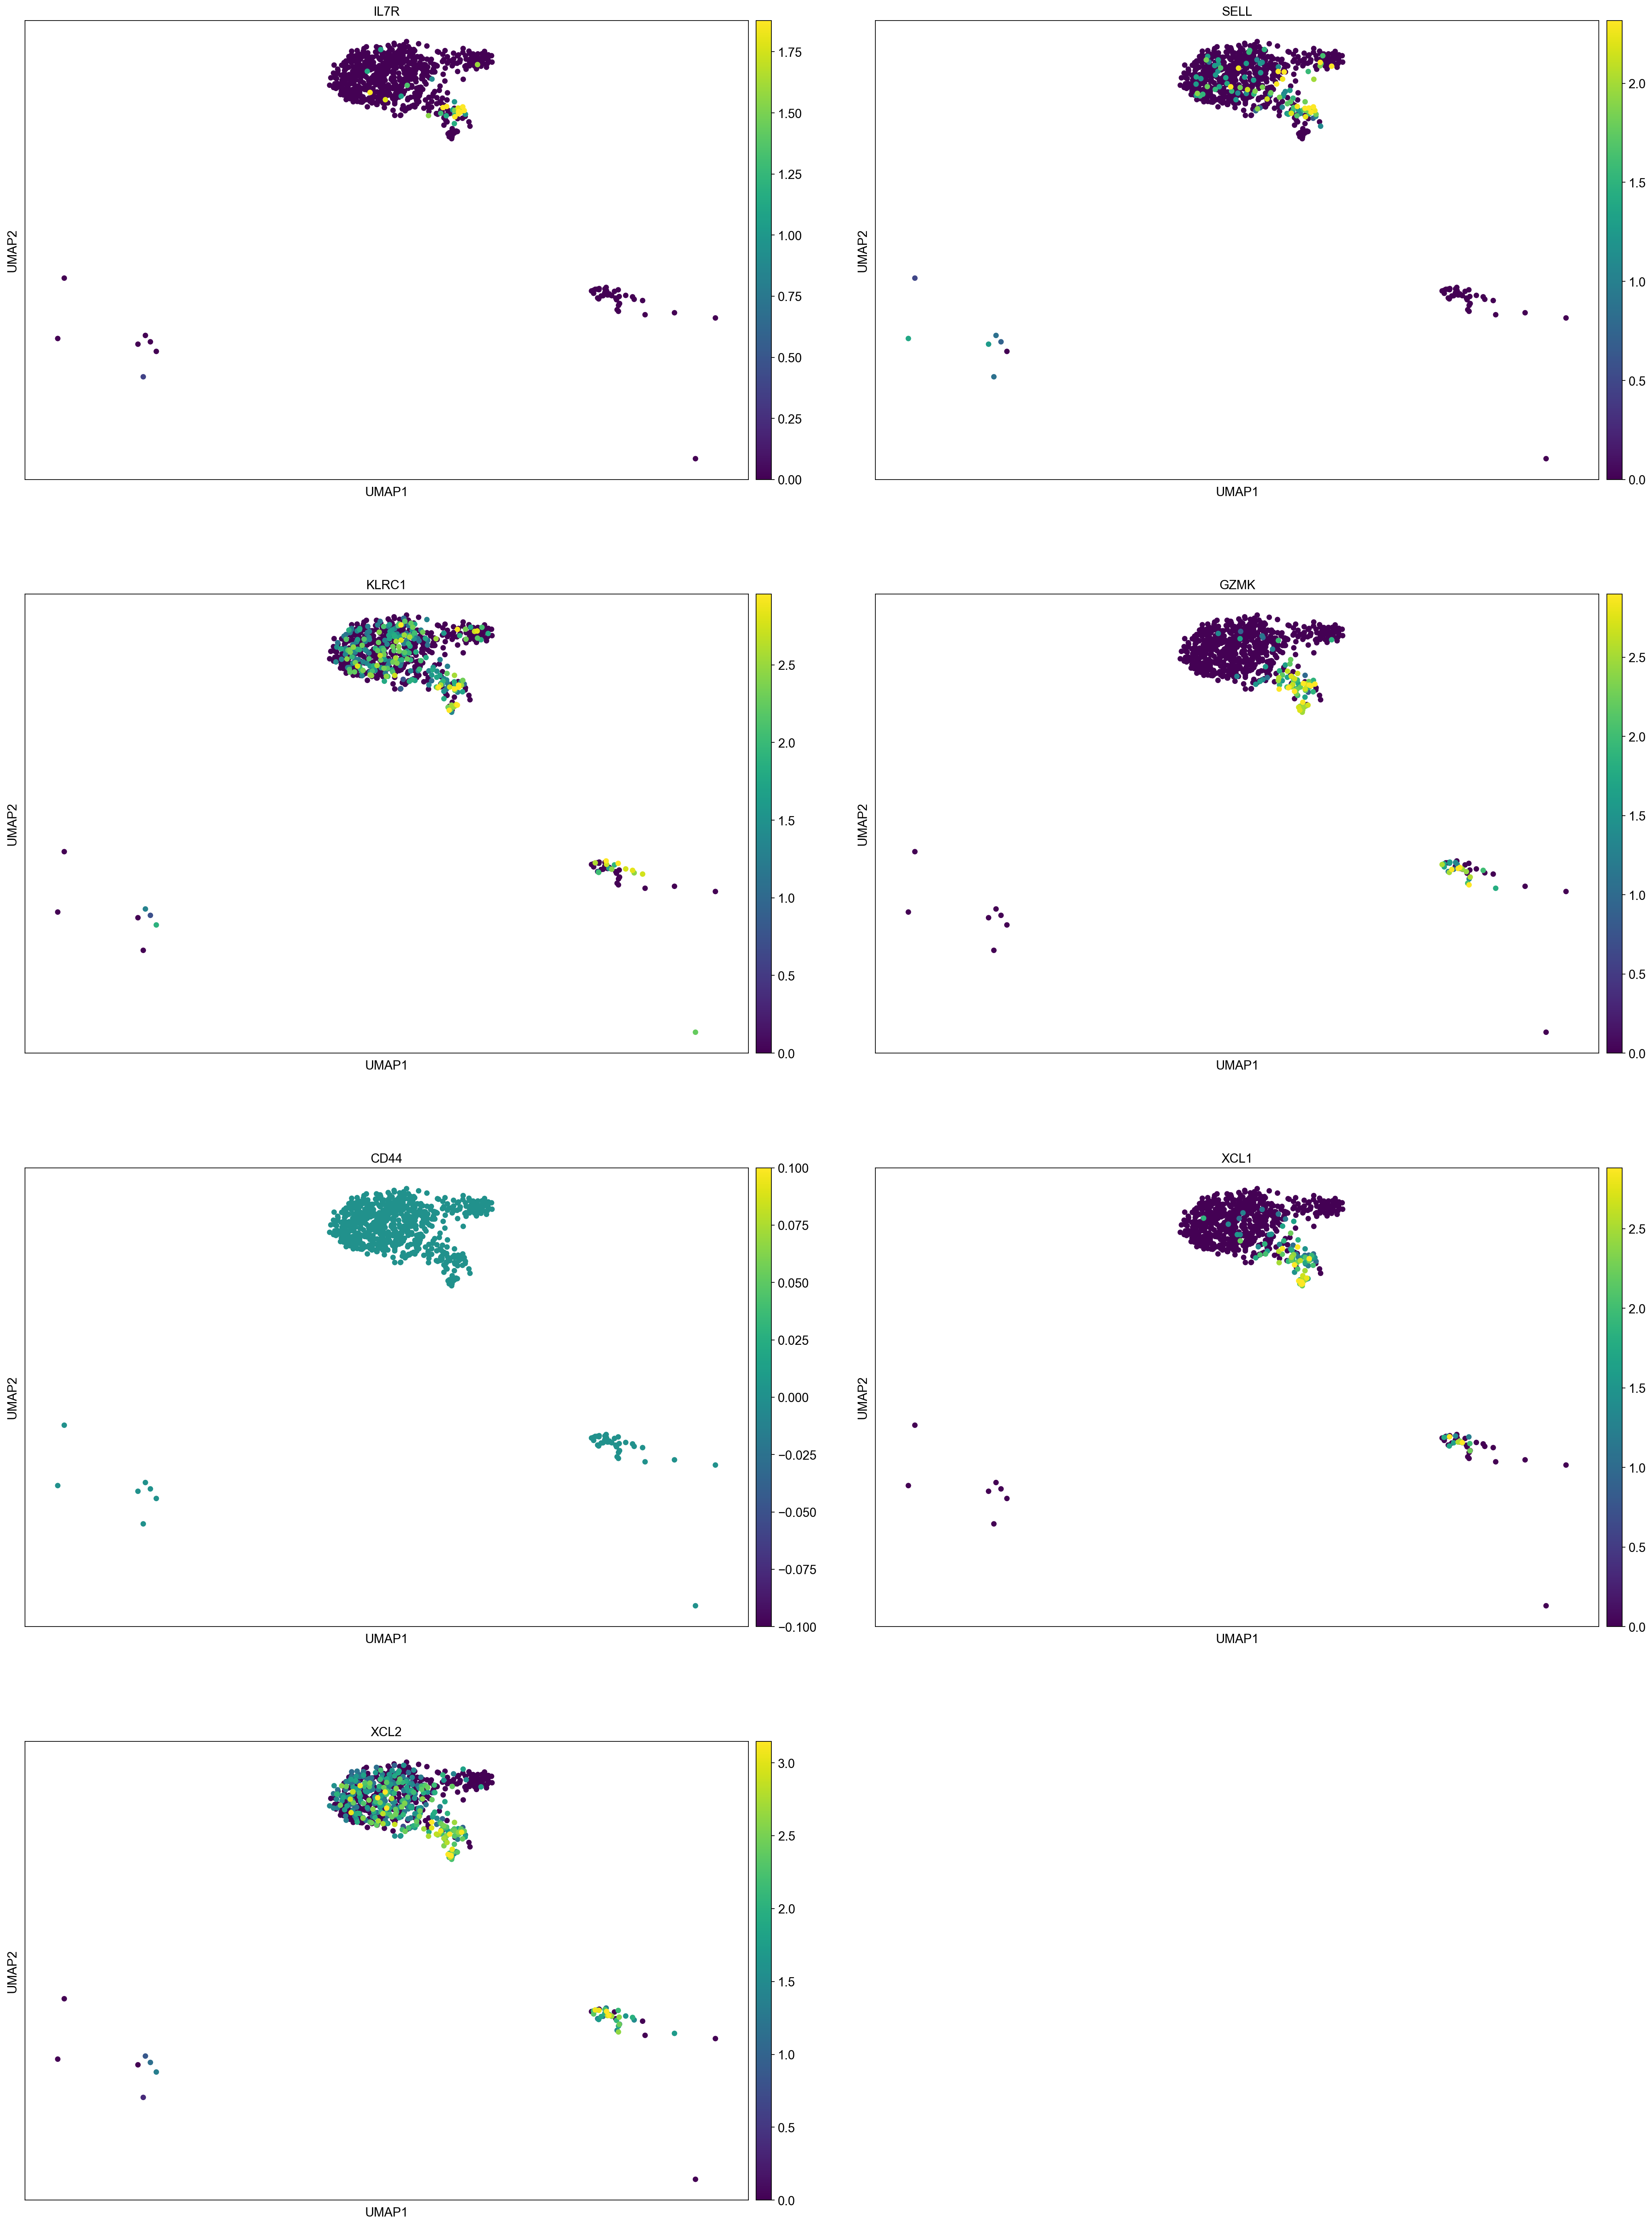

Immature CD56bright NK cell, protein (SELL=CD62L)


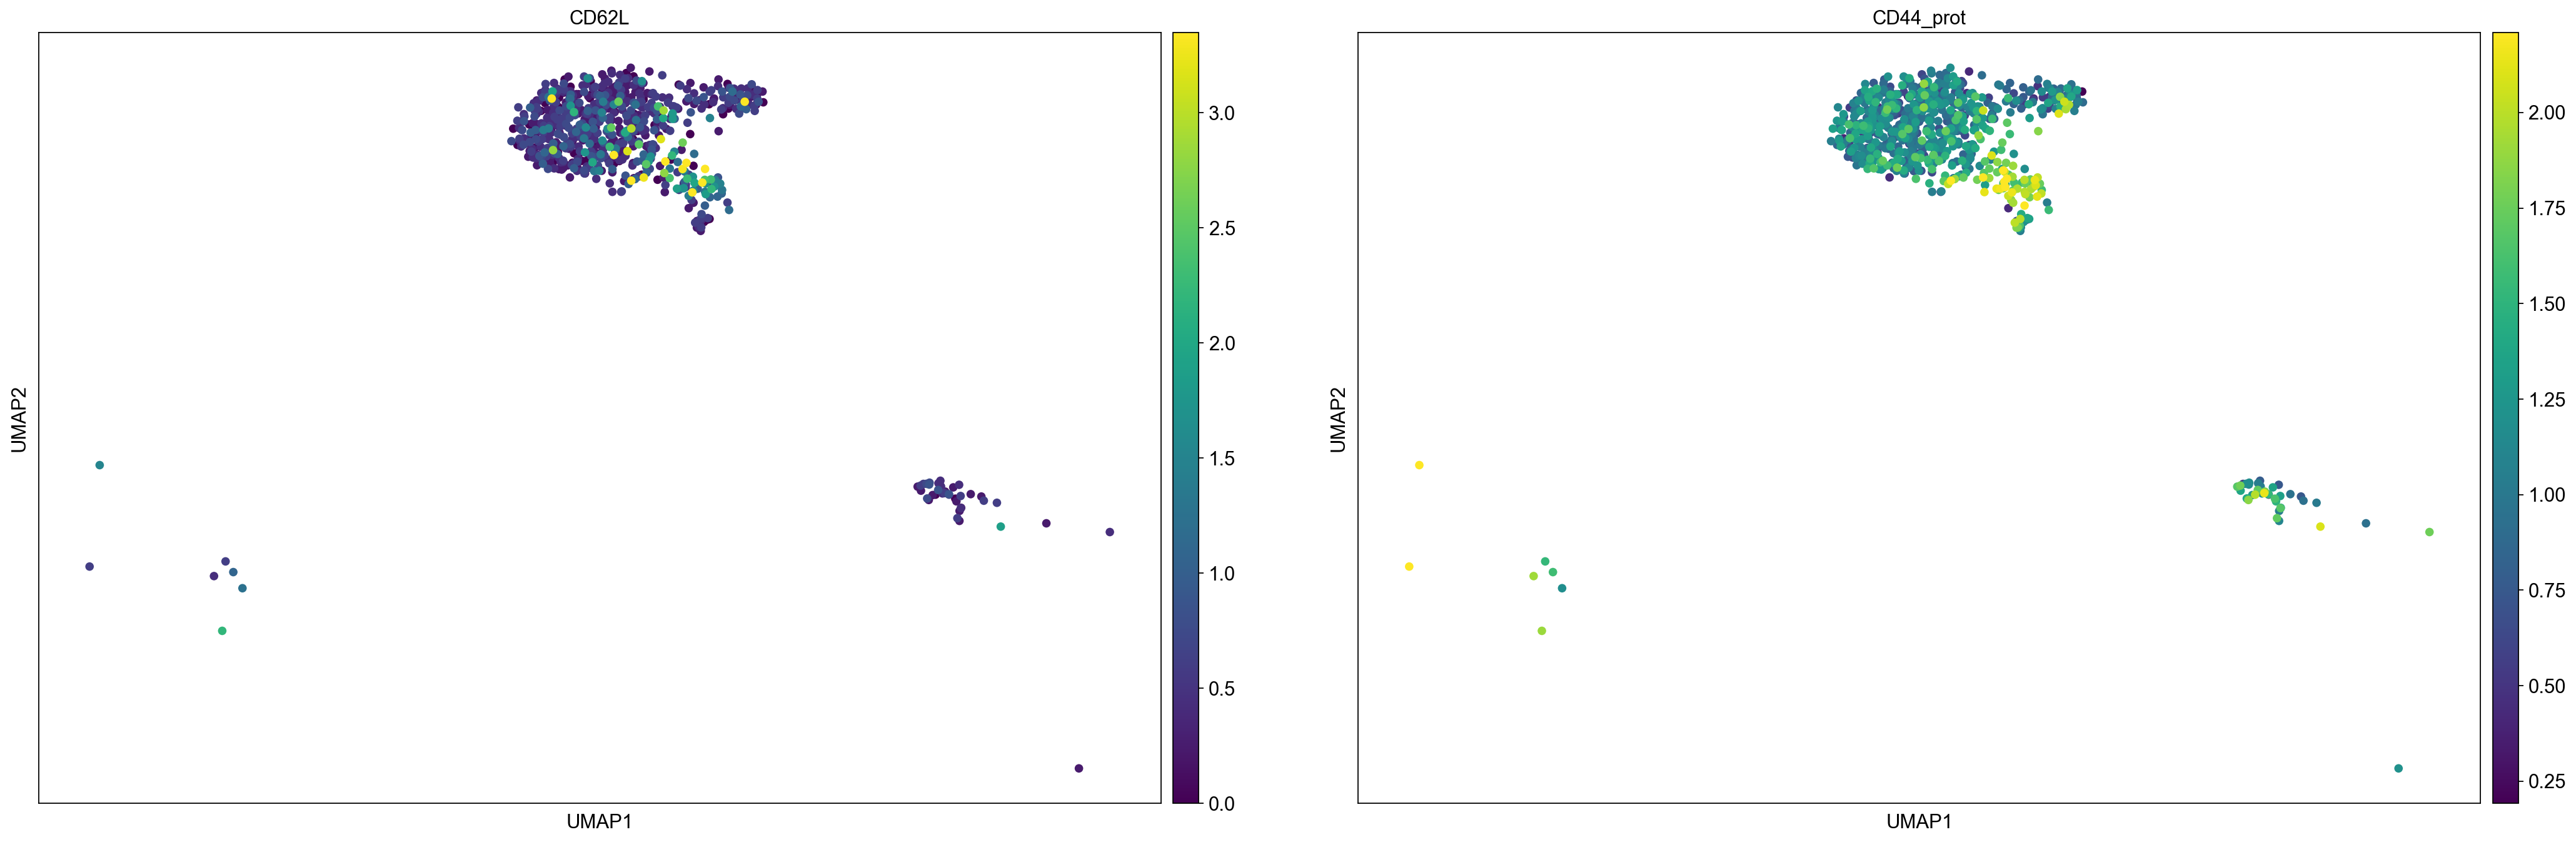

In [209]:
#Immature CD56bright NK cells

#"Recently, NK cell-derived XCL1 has been shown to recruit conventional type 1 DCs to the tumor microenvironment, which is critical to the antitumor immunity"

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

CD56brigh_yang= ['IL7R', 'SELL', 'KLRC1', 'GZMK', 'CD44', 'XCL1', 'XCL2']

CD56brigh_yang_prot = ['CD62L', 'CD44_prot']


print("Immature CD56bright NK cell, RNA")
sc.pl.umap(sample_nk, color = CD56brigh_yang, vmax="p99", color_map = 'viridis', ncols=2)

print("Immature CD56bright NK cell, protein (SELL=CD62L)")
sc.pl.umap(sample_nk, color = CD56brigh_yang_prot, vmax="p99", color_map = 'viridis', ncols=2)



## Other testing

In [53]:
gammadelta_sep = ['TRG-AS1', 'TRGC1', 'TRGC2', 'TRGV10', 'TRGV2', 'TRGV3', 'TRGV4', 'TRGV5', 'TRGV7', 'TRGV9']

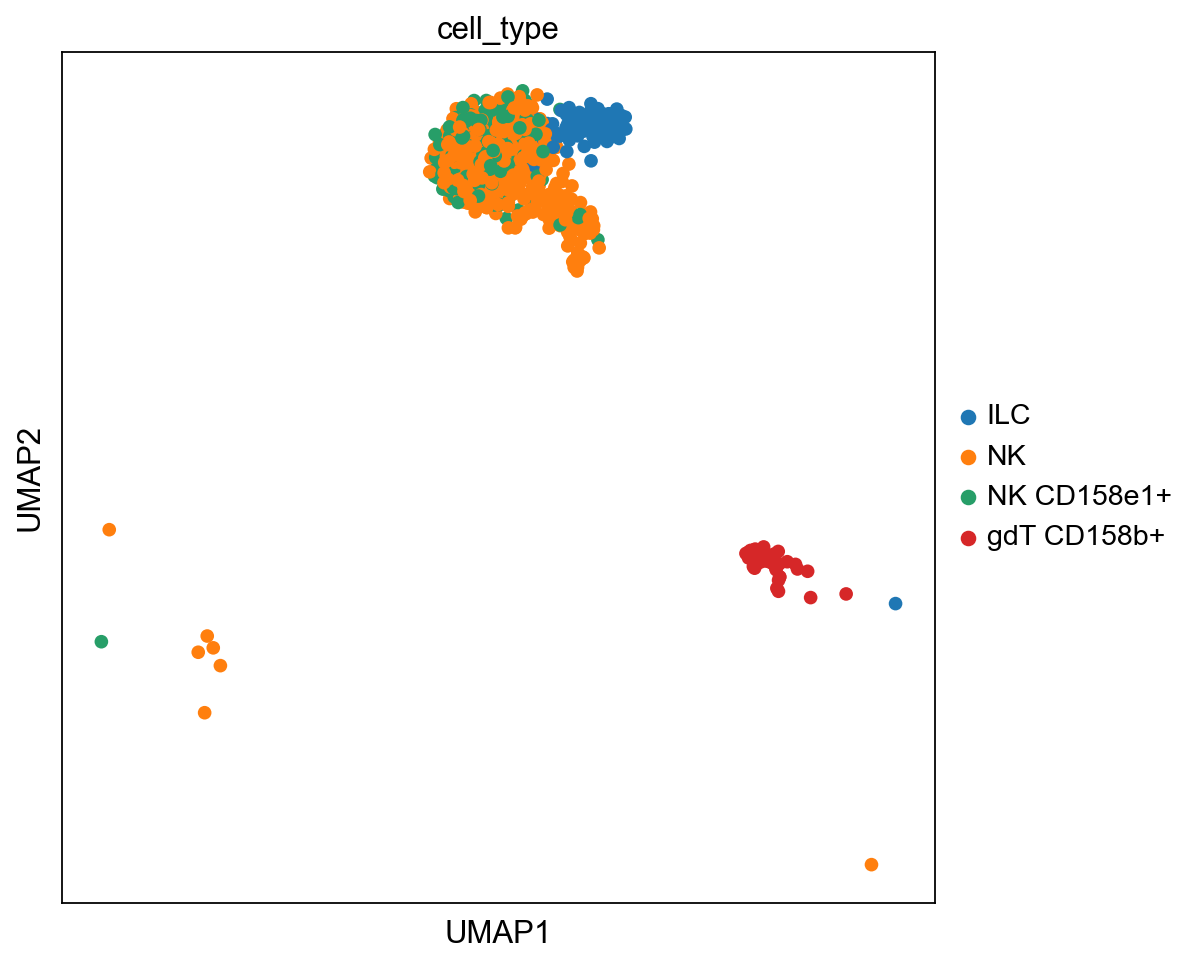

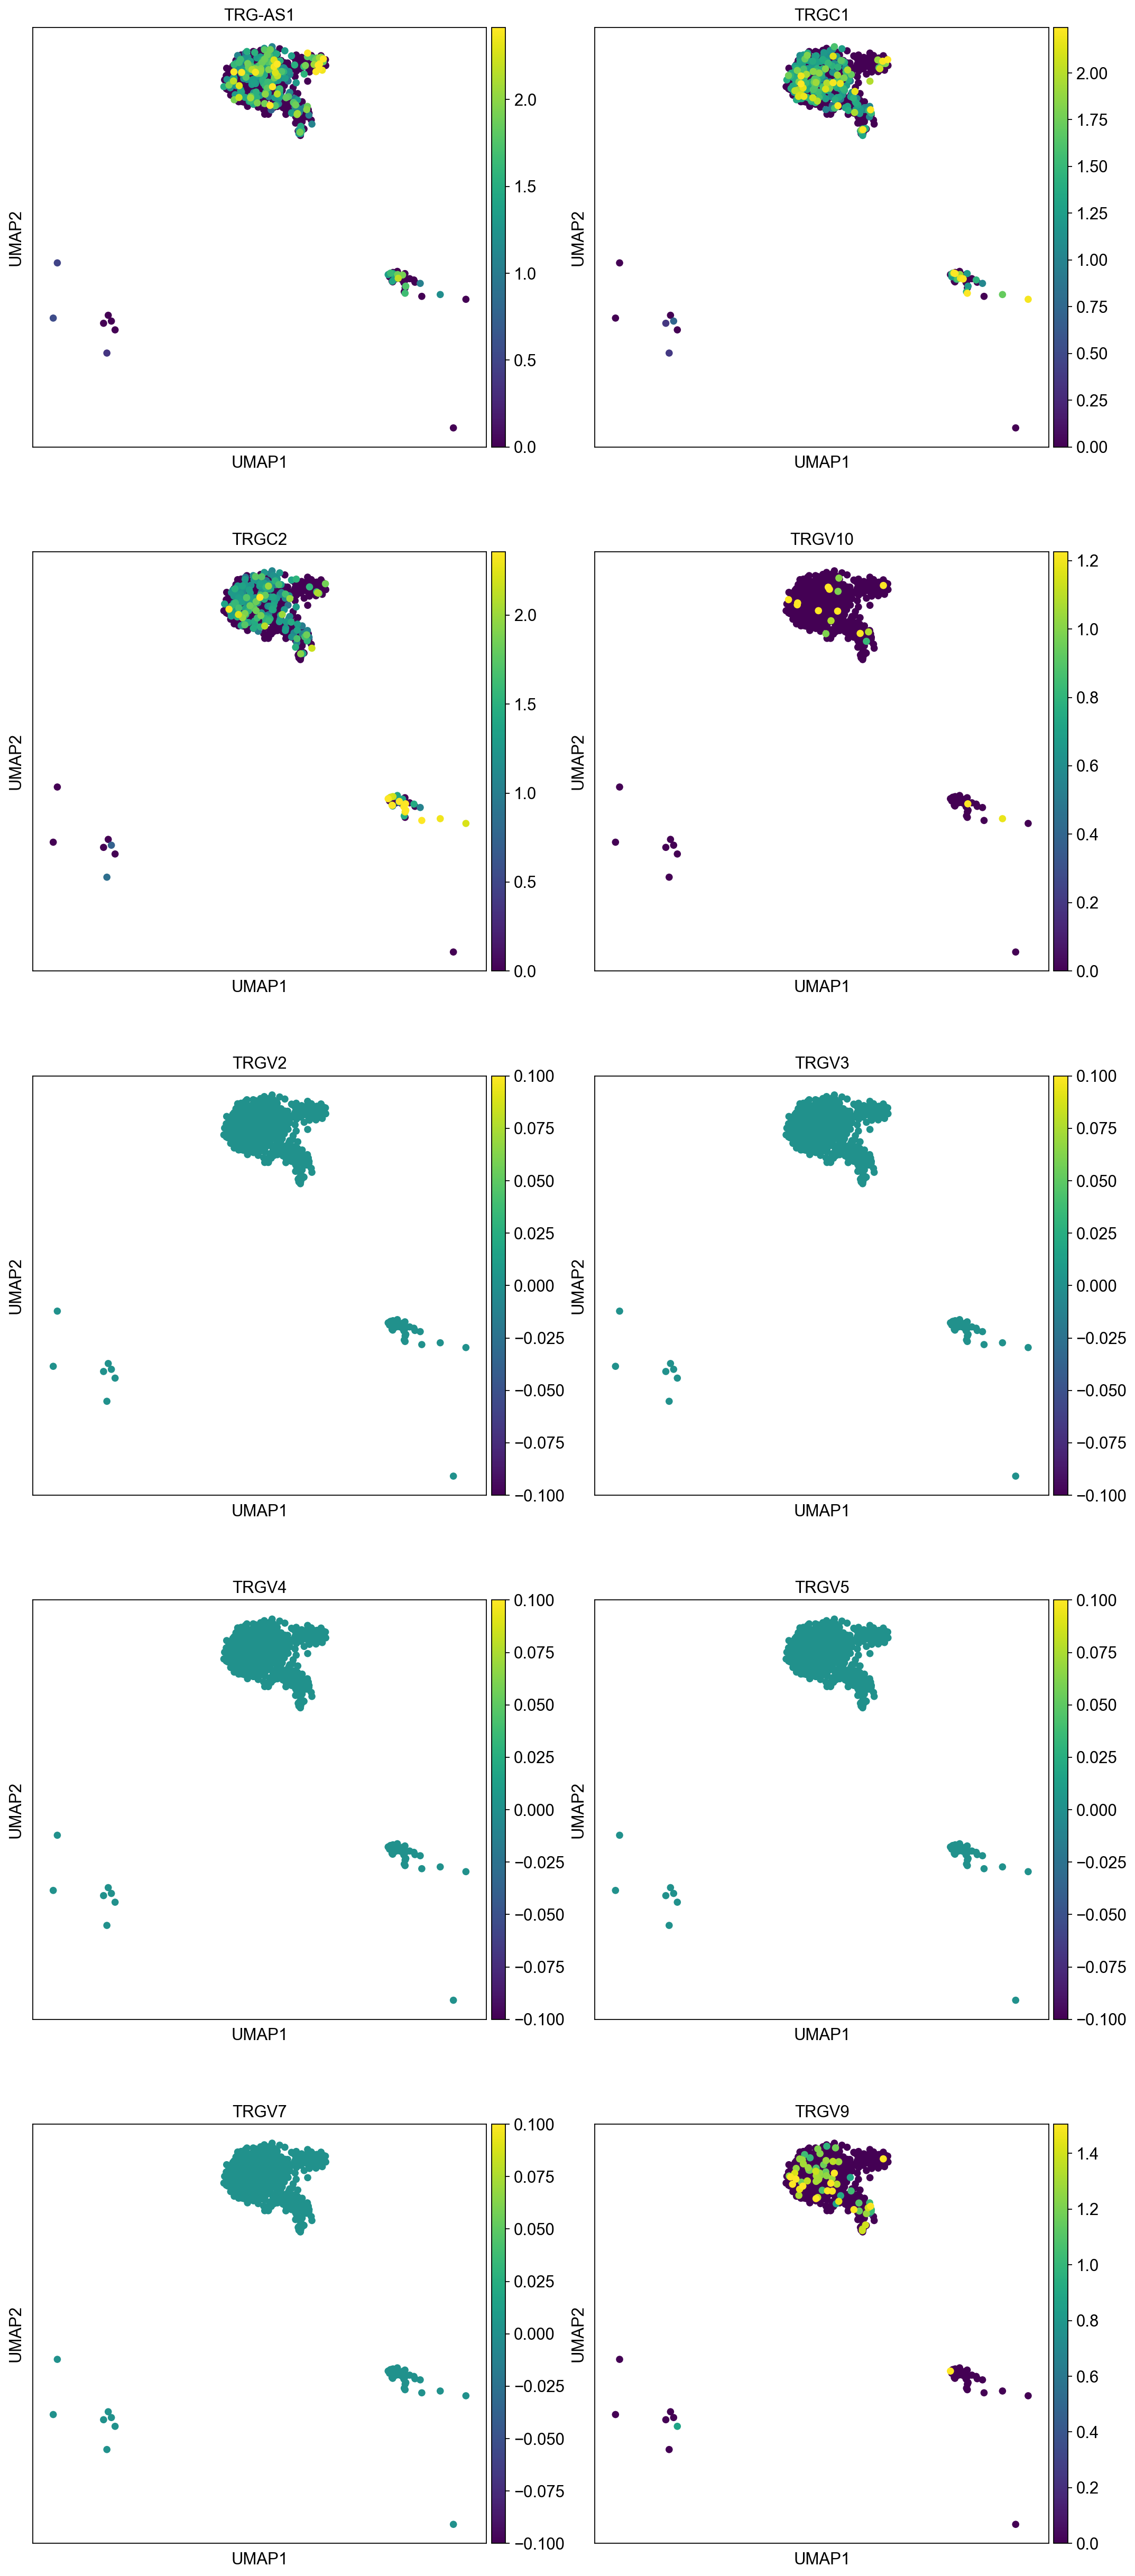

In [54]:
#separation from gamma delta T cells

gammadelta_sep = ['TRG-AS1', 'TRGC1', 'TRGC2', 'TRGV10', 'TRGV2', 'TRGV3', 'TRGV4', 'TRGV5', 'TRGV7', 'TRGV9']

sc.pl.umap(sample_nk, color = ['cell_type'], vmax="p99", color_map = 'viridis', ncols=2)

sc.pl.umap(sample_nk, color = gammadelta_sep, vmax="p99", color_map = 'viridis', ncols=2)

In [55]:
#CLR normalized protein data, Neurips only

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_outer_!m.h5ad')

In [56]:
#Checking if gene was measured in particular study

adata[adata.to_df()['B3GAT1'] != 0].obs.BATCH.unique().tolist()

['Seurat', 'Granja2', 'Manton']

In [57]:
result = [i for i in adata_neurips.var_names if i.startswith('KIR')]
print(result)

['KIR2DL1', 'KIR2DL2', 'KIR2DL3', 'KIR2DL4', 'KIR3DL1', 'KIR3DL2', 'KIR3DX1', 'KIRREL3']


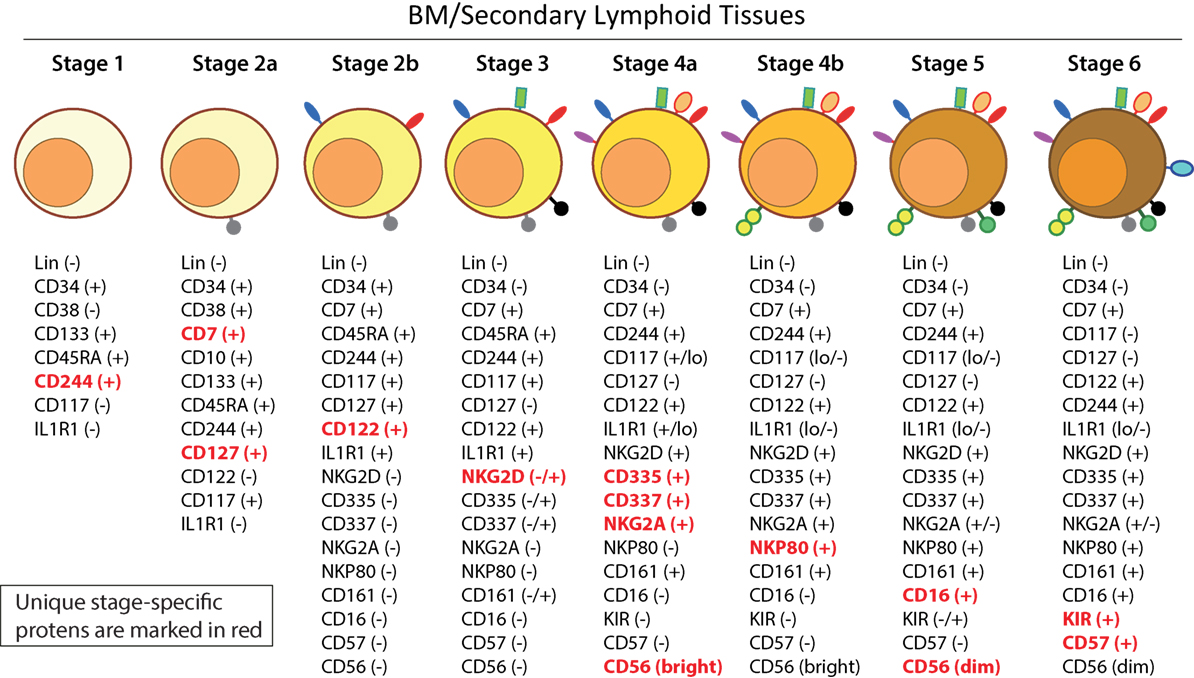

In [58]:
#NKG2A = KLRC1

stage1=["CD224_prot"]
stage2a= ['CD7', 'CD127']
stage2b= ['CD122']
stage3= ["CD314"]
stage4a= ['CD335',"CD56"]
#Stage4b = NKP80 marker not included
stage5= ['CD16']
stage6 = ['CD158e1', 'CD57']


In [59]:
#Used to check which markers were measured


listOfmarkers= ["CD186"]


for x in listOfmarkers:
    if x in prot.columns:
        print("Yes")
        

In [60]:
#If needed, column names can be changes (if gene and prot name same)
prot=prot.rename(columns={'CD224': 'CD224_prot'})

stage 1


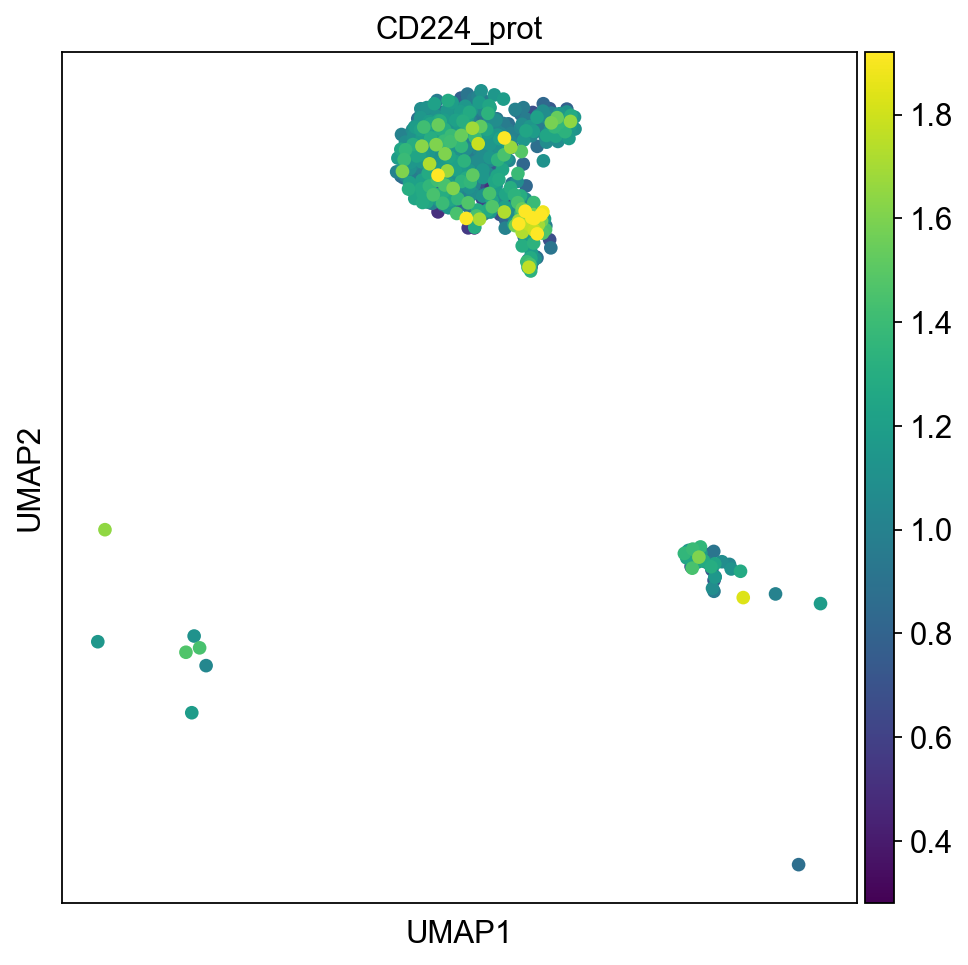

stage 2a


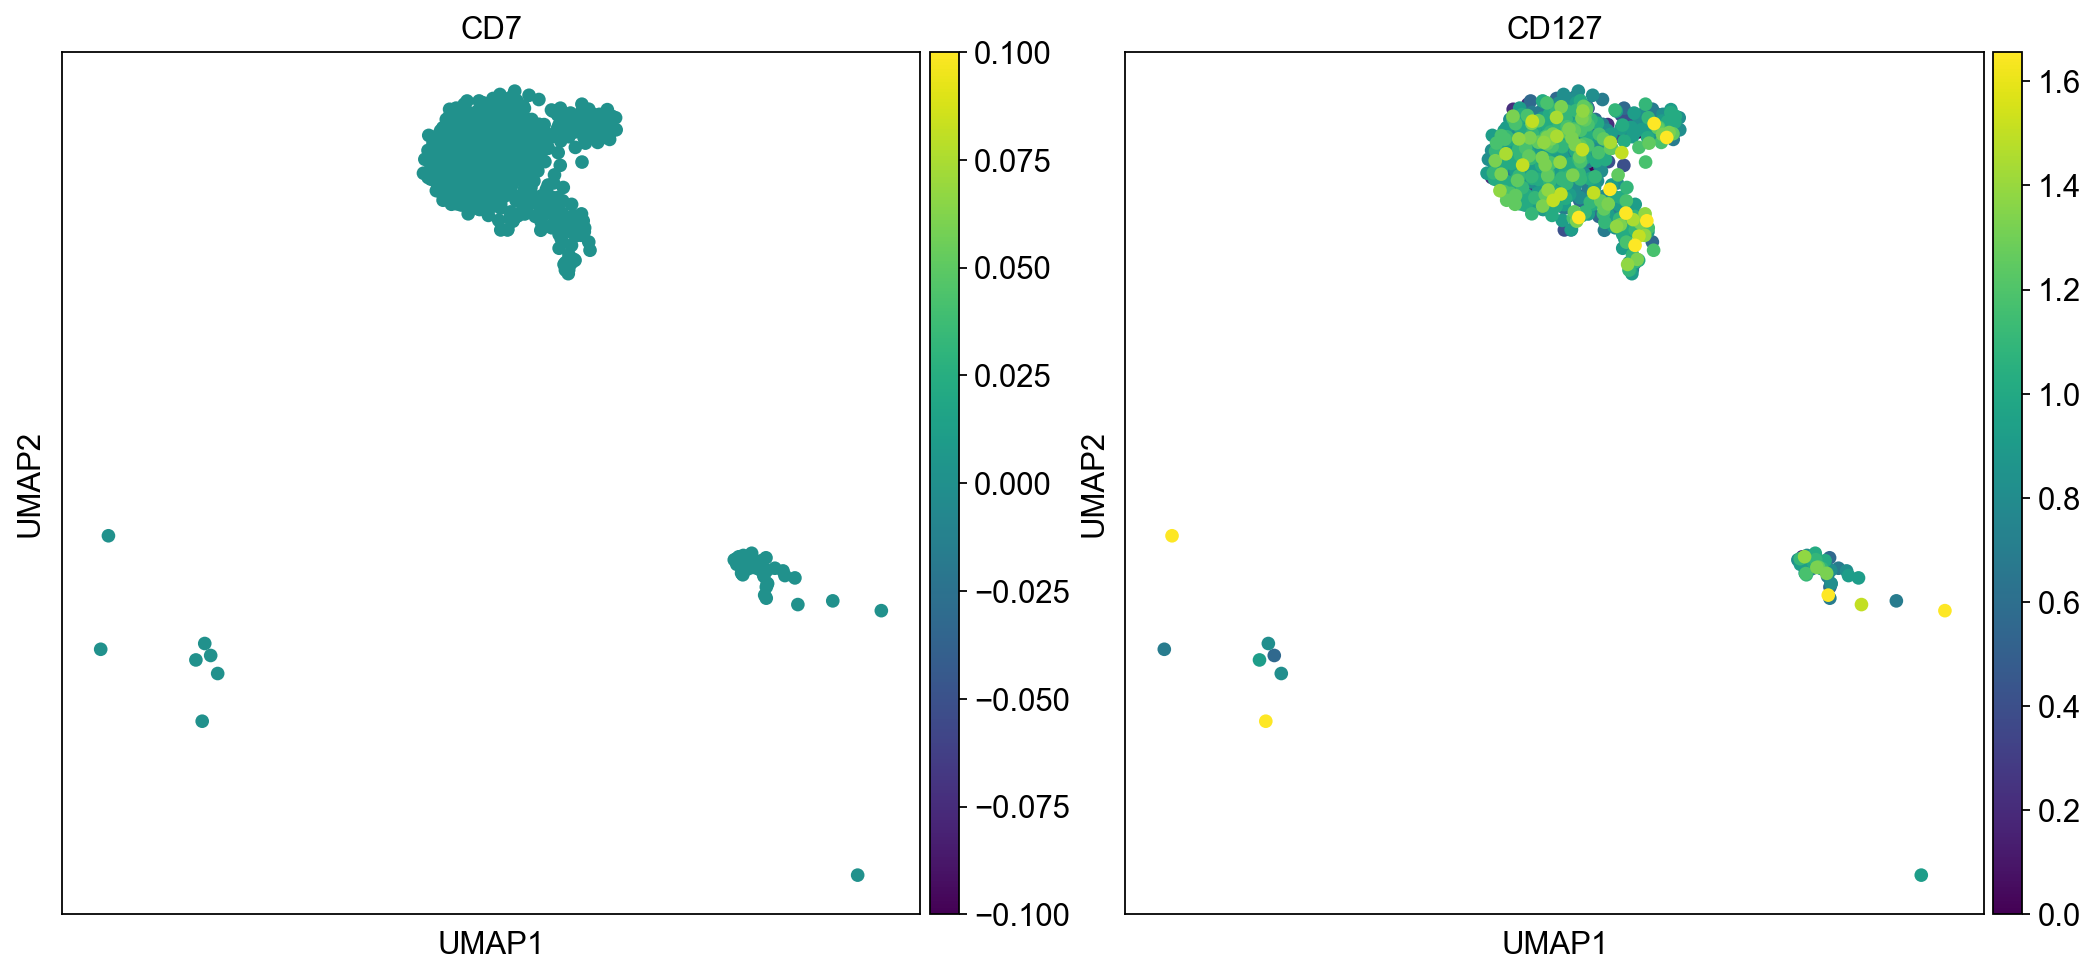

stage 2b


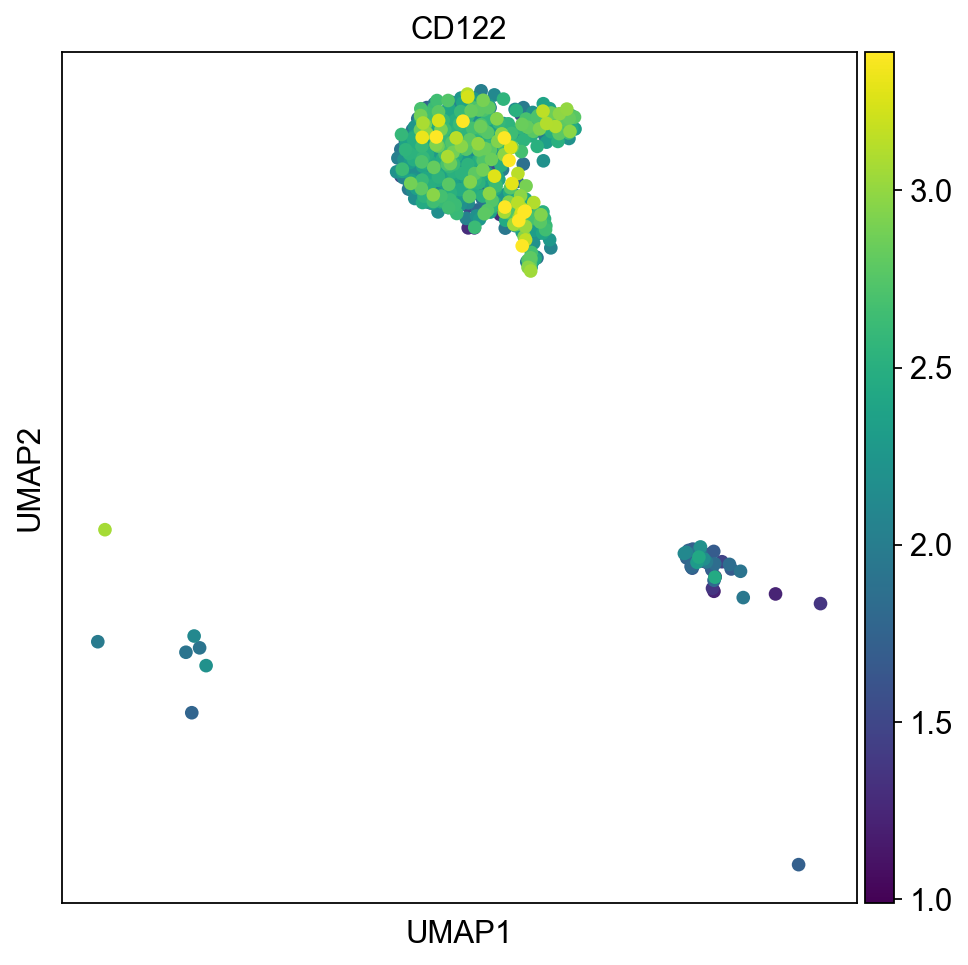

stage 3


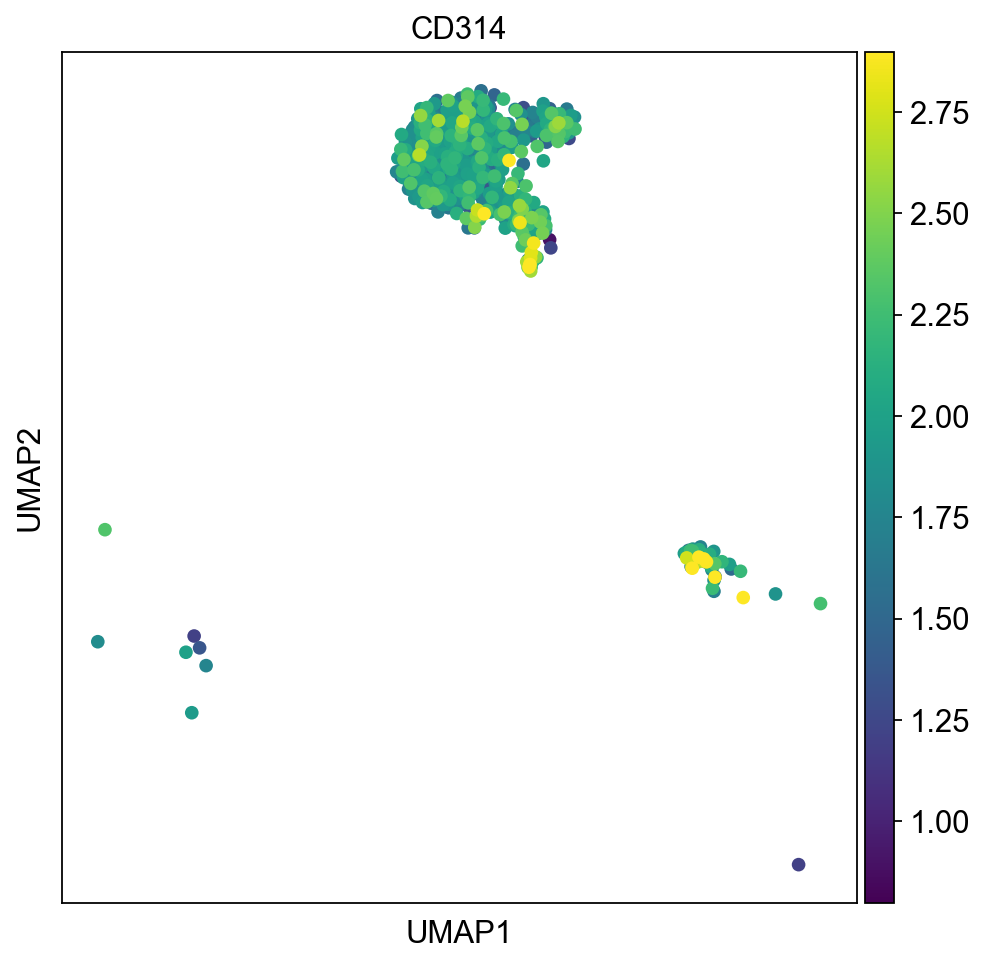

stage 4a, CD56bright


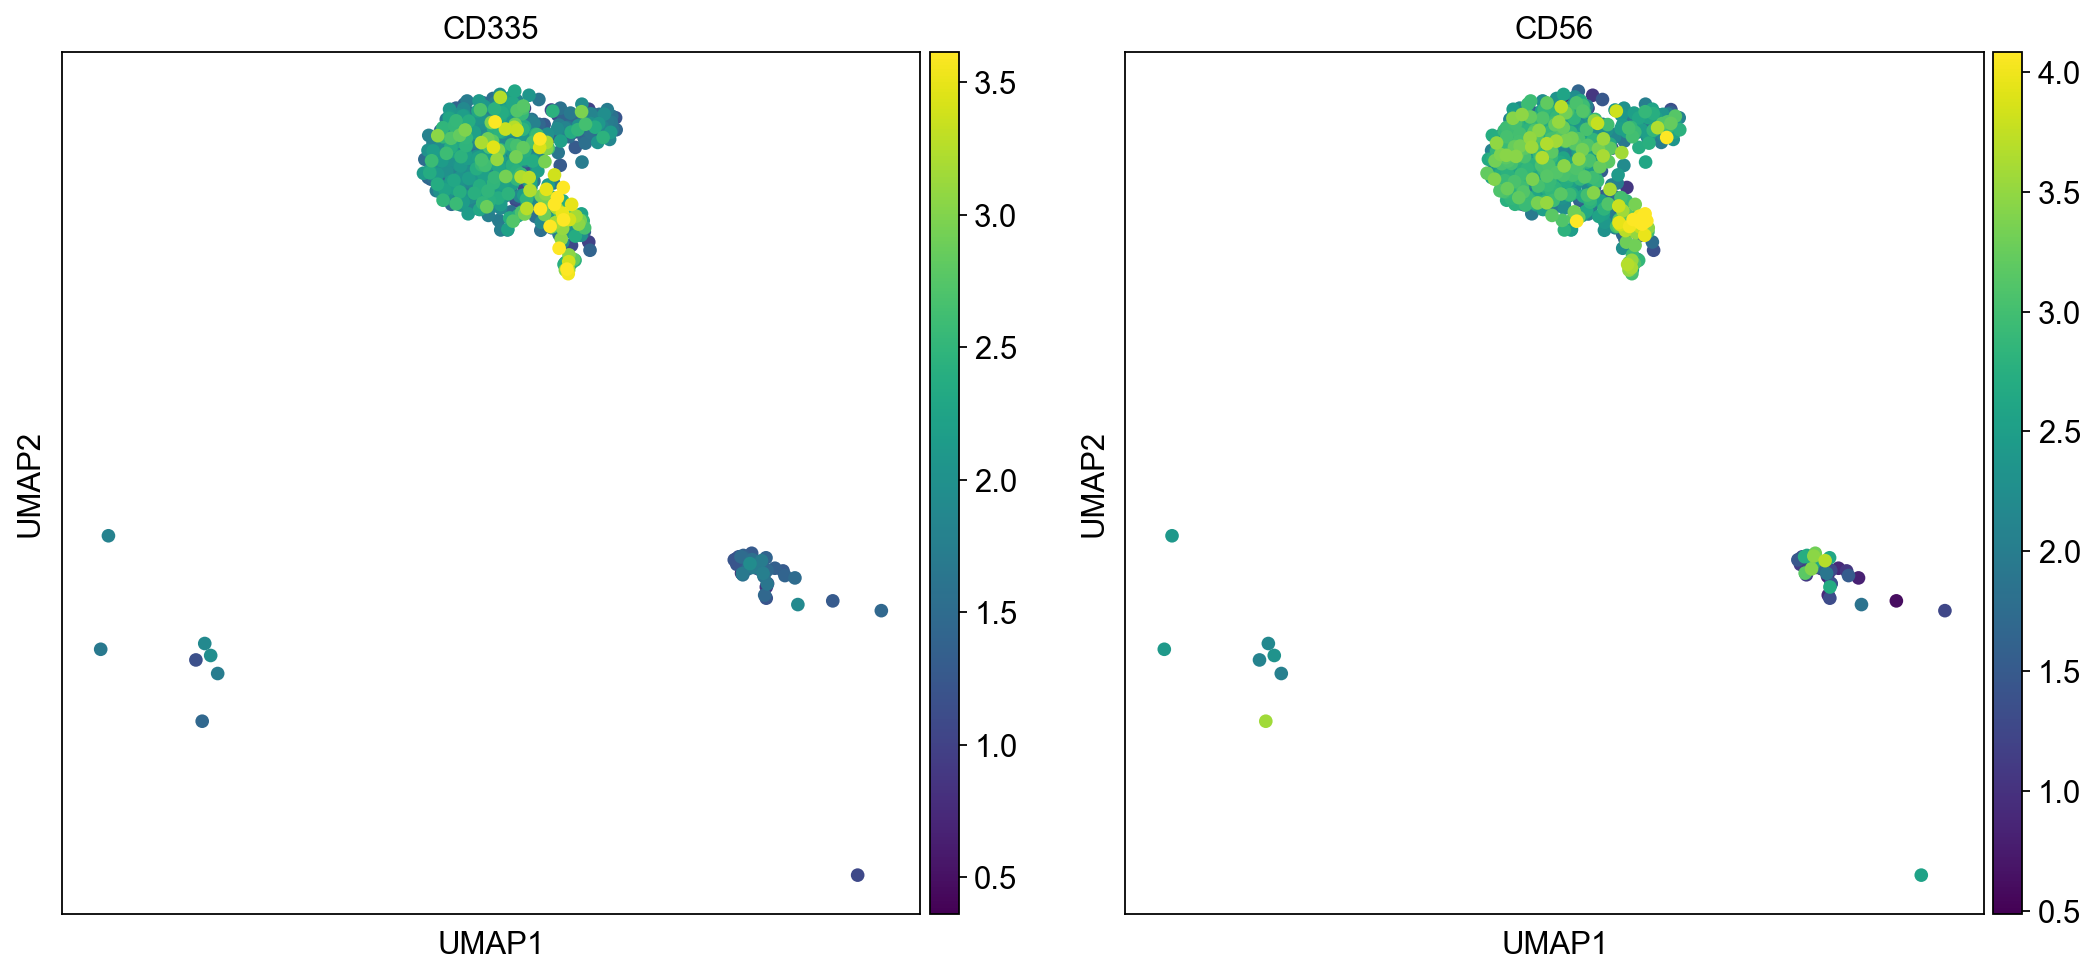

stage 5


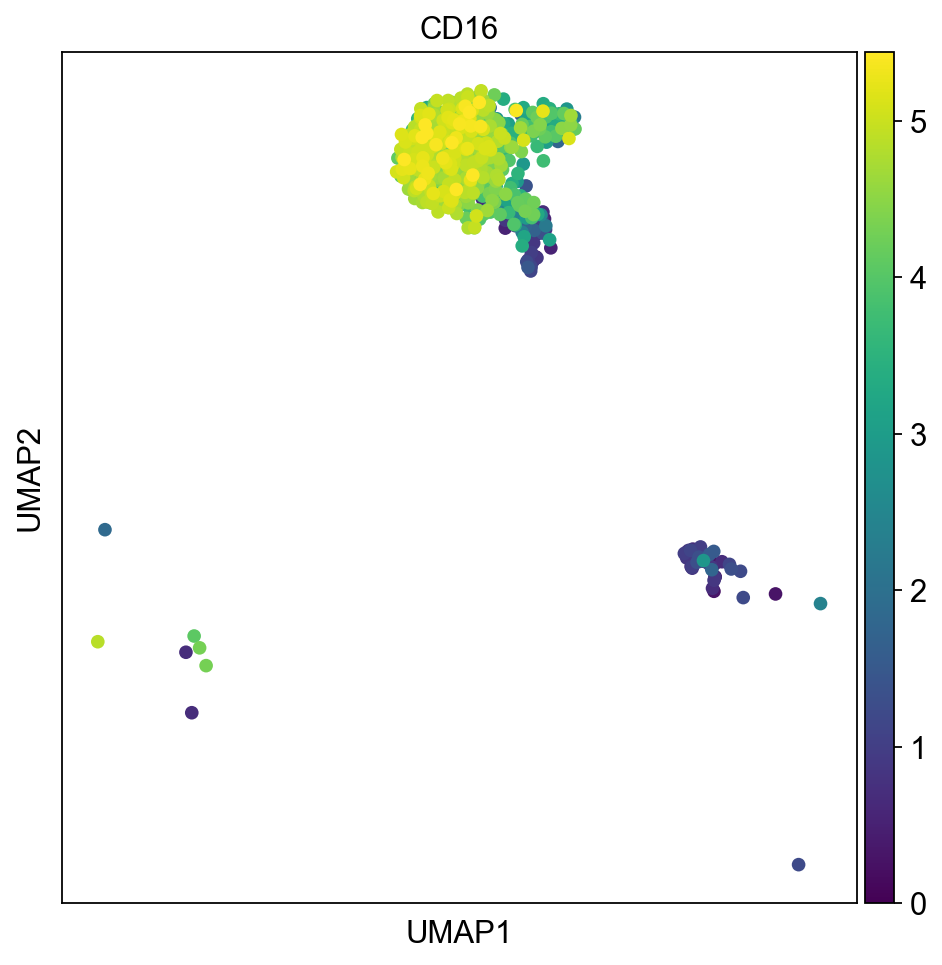

stage 6


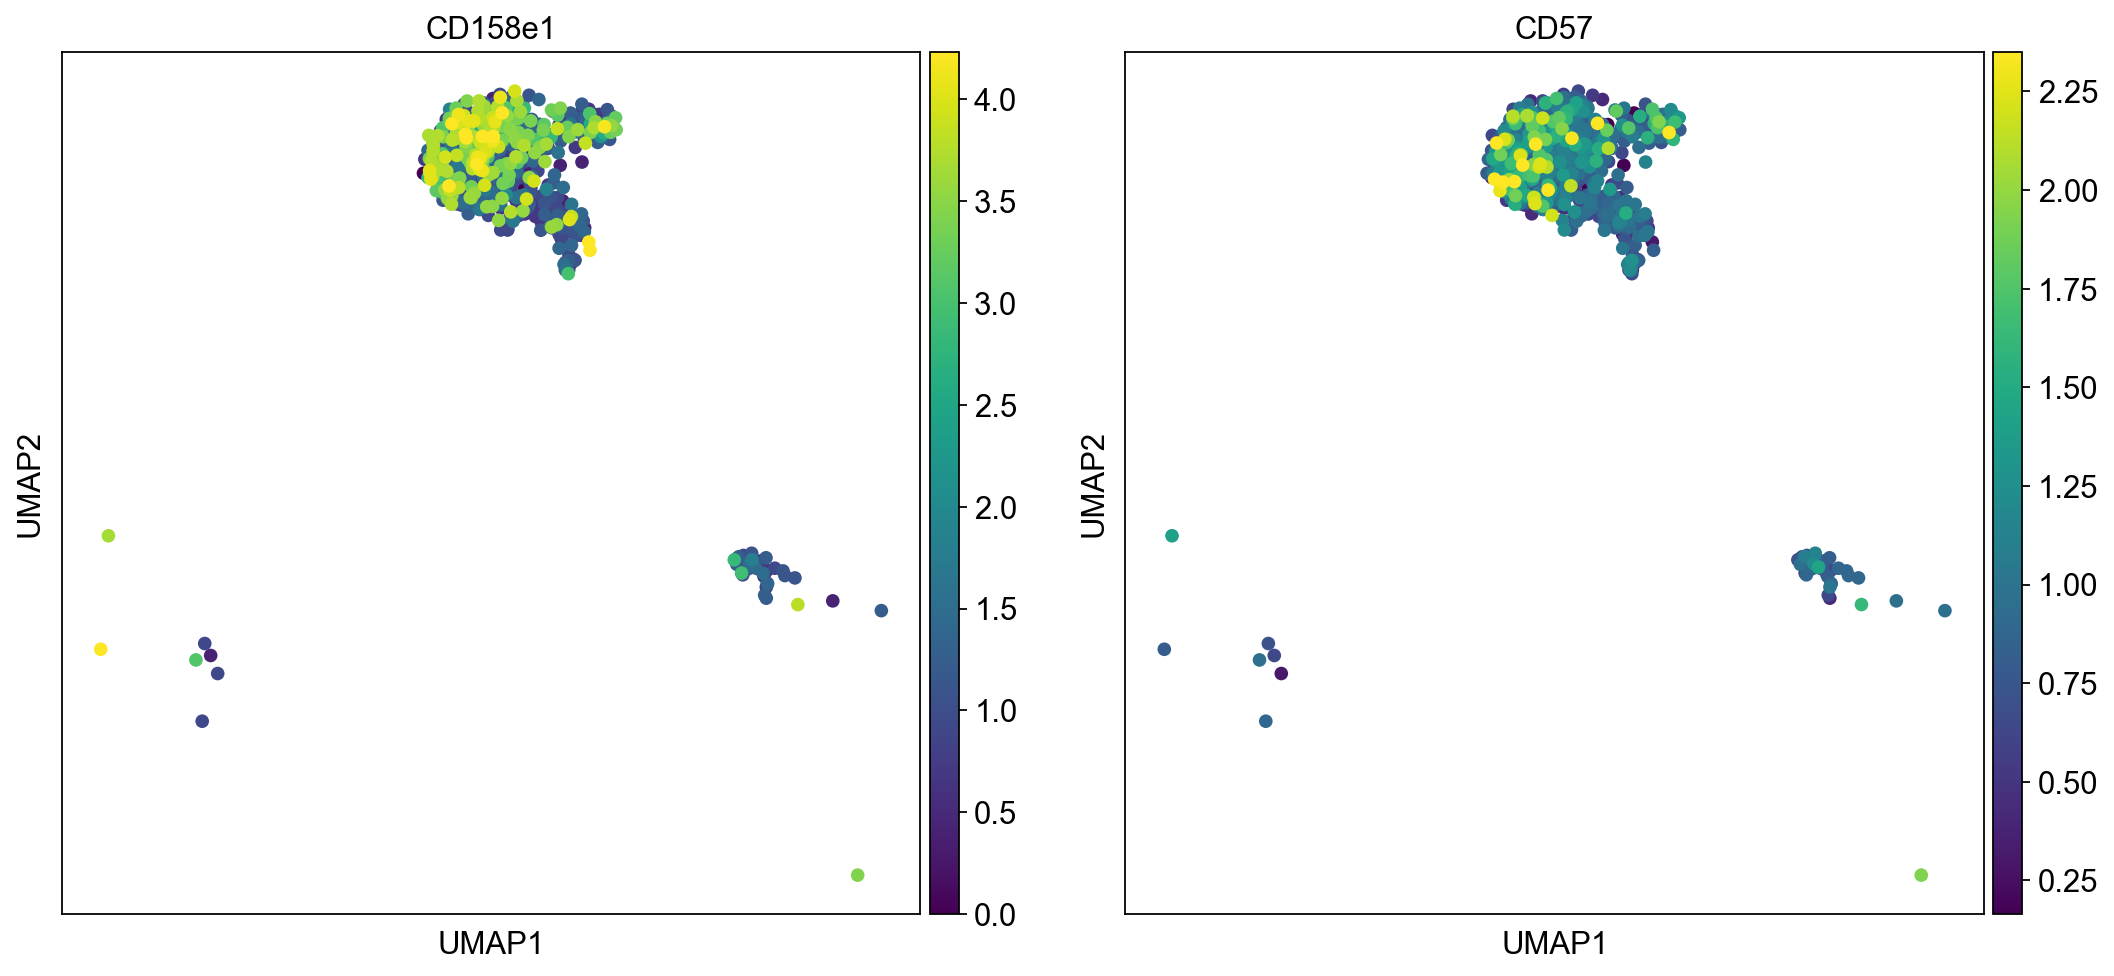

In [62]:
sc.set_figure_params(figsize=(7, 7))

#stage 1
print("stage 1")
sc.pl.umap(sample_nk, color = stage1, vmax="p99", color_map = 'viridis', ncols=2)

#stage 2a
print("stage 2a")
sc.pl.umap(sample_nk, color = stage2a, vmax="p99", color_map = 'viridis', ncols=2)

#stage 2b
print("stage 2b")
sc.pl.umap(sample_nk, color = stage2b, vmax="p99", color_map = 'viridis', ncols=2)

#stage 3
print("stage 3")
sc.pl.umap(sample_nk, color = stage3, vmax="p99", color_map = 'viridis', ncols=2)

#stage 4a
print("stage 4a, CD56bright")
sc.pl.umap(sample_nk, color = stage4a, vmax="p99", color_map = 'viridis', ncols=2)

#stage 5
print("stage 5")
sc.pl.umap(sample_nk, color = stage5, vmax="p99", color_map = 'viridis', ncols=2)

#stage 6
print("stage 6")
sc.pl.umap(sample_nk, color = stage6, vmax="p99", color_map = 'viridis', ncols=2)


